# **Telecom Churn Case Study**

## Problem Statement

### Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, we will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.


### Goals
- In this project, we will analyse customer-level data of a leading telecom firm, build predictive machine learning models to identify customers at high risk of churn and identify the main indicators of churn based on the features provided for their usage.

## Understanding Customer behaviour during churn:

Customers usually do not decide to switch to another competitor instantly, but rather over a
period of time (this is especially applicable to high-value customers). In churn prediction, we
assume that there are three phases of customer lifecycle :

1. <u>The ‘good’ phase:</u> In this phase, the customer is happy with the service and behaves as usual.

2. <u>The ‘action’ phase:</u> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. <u>The ‘churn’ phase:</u> In this phase, the customer is said to have churned. In this case, since we are working over a three-month window, the first & second month (Jun-Jul) is the ‘good’ phase, the second month (August) is the ‘action’ phase. The third month (September) is the ‘churn’ phase, for which we dont't have the data as they are already churned.

# Loading dependencies & datasets


In [1]:
#Data Structures
import pandas as pd
import numpy as np

#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

# XG Boost
from xgboost import XGBClassifier

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import optuna
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# pd.set_option("display.max_columns", 300)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")

print("data : ", data.shape)
print("unseen : ", unseen.shape)

data :  (69999, 172)
unseen :  (30000, 171)


In [3]:
# data preparation for unseen data
unseen_cleaned = unseen.copy()

In [4]:
data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [5]:
data.columns.values

array(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'arpu_6', 'arpu_7', 'arpu_8',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6',
       'std_og_t2c_mou_7', 'std_og_t2c_mou_8

In [6]:
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [7]:
data.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

# Data Cleaning

In [8]:
# Creating column name list by column type for easy access

# ID columns - No. of columns = 2
id_cols = ['id', 'circle_id']

# Date columns (represents date) - No. of columns = 9
date_cols = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
             'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
            'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']

# Categorical columns (excluding 'churn_probability') (represents 0/1) - No. of columns = 6
cat_cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
            'fb_user_6', 'fb_user_7', 'fb_user_8']

# Decision Column - No. of columns = 1
churn_col = ['churn_probability']

# Numerical columns - No. of columns = 154
num_cols = [column for column in data.columns if column not in id_cols + date_cols + cat_cols + churn_col]



In [9]:
# Printing % of null values in each column
def print_nulls(data):
    null_values = round((data.isnull().sum()/data.shape[0] * 100), 2)
    print("Missing value ratio: \n")
    print(null_values[null_values > 0], "\n")

# Getting % of null values in each column
def get_nulls(data):
    null_values = round((data.isnull().sum()/data.shape[0] * 100), 2)
    return null_values[null_values > 0]

In [10]:
# Percentage of null values in each column
print("Percentage of null values in unseen: \n")
print_nulls(unseen_cleaned)
print("Percentage of null values in data: \n")
print_nulls(data)

Percentage of null values in unseen: 

Missing value ratio: 

loc_og_t2o_mou               1.05
std_og_t2o_mou               1.05
loc_ic_t2o_mou               1.05
last_date_of_month_7         0.67
last_date_of_month_8         1.22
onnet_mou_6                  3.90
onnet_mou_7                  3.91
onnet_mou_8                  5.58
offnet_mou_6                 3.90
offnet_mou_7                 3.91
offnet_mou_8                 5.58
roam_ic_mou_6                3.90
roam_ic_mou_7                3.91
roam_ic_mou_8                5.58
roam_og_mou_6                3.90
roam_og_mou_7                3.91
roam_og_mou_8                5.58
loc_og_t2t_mou_6             3.90
loc_og_t2t_mou_7             3.91
loc_og_t2t_mou_8             5.58
loc_og_t2m_mou_6             3.90
loc_og_t2m_mou_7             3.91
loc_og_t2m_mou_8             5.58
loc_og_t2f_mou_6             3.90
loc_og_t2f_mou_7             3.91
loc_og_t2f_mou_8             5.58
loc_og_t2c_mou_6             3.90
loc_og_t2c_mou_7    

If we observe the null values we can see a pattern among the columns w.r.t each month. Let's say _6, 
<br> 
date_of_last_rech_data_6, total_rech_data_6, max_rech_data_6, 
<br> 
count_rech_2g_6, count_rech_3g_6, av_rech_amt_data_6, 
<br> 
arpu_3g_6, arpu_2g_6, night_pck_user_6, fb_user_6 
<br> 
All have the same amount of null values. The same pattern can be seen for the columns of other months as well.
<br>
So essentially we can replace all the null values in these column with zero and our data should remain unaffected.

In [12]:
# Data Recharge columns
rech_data_cols = ['total_rech_data_6', 'max_rech_data_6', 'count_rech_2g_6',
                  'count_rech_3g_6', 'av_rech_amt_data_6',

                  'total_rech_data_7', 'max_rech_data_7', 'count_rech_2g_7',
                  'count_rech_3g_7', 'av_rech_amt_data_7',

                  'total_rech_data_8', 'max_rech_data_8', 'count_rech_2g_8',
                  'count_rech_3g_8', 'av_rech_amt_data_8']

In [13]:
rech_data_na = data.loc[ data['total_rech_data_6'].isnull(), rech_data_cols]
rech_data_na.head()

,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,total_rech_data_7,max_rech_data_7,count_rech_2g_7,count_rech_3g_7,av_rech_amt_data_7,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,1.0,145.0,0.0,1.0,145.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# From the above example, we can observe that the columns
# ['total_rech_data_6', 'max_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6']
# go NaN at the same time, which explains that the user haven't done data recharge that month

# Same pattern is followed for other months as well.

# Hence imputing those columns with 0

data[rech_data_cols] = data[rech_data_cols].apply(lambda x : x.fillna(0))
unseen_cleaned[rech_data_cols] = unseen_cleaned[rech_data_cols].apply(lambda x : x.fillna(0))

In [15]:
# Checking the imputation

print_nulls(data[rech_data_cols]) # Finding nulls in data recharge columns

Missing value ratio: 

Series([], dtype: float64) 



In [16]:
# Checking missing values in categorical cols

print_nulls(data[cat_cols])

Missing value ratio: 

night_pck_user_6    74.90
night_pck_user_7    74.48
night_pck_user_8    73.69
fb_user_6           74.90
fb_user_7           74.48
fb_user_8           73.69
dtype: float64 



In [17]:
# Replacing the missing values of these columns with -1
data[cat_cols] = data[cat_cols].apply(lambda x: x.fillna(-1))
unseen_cleaned[cat_cols] = unseen_cleaned[cat_cols].apply(lambda x: x.fillna(-1))

In [18]:
# Checking the imputation
print_nulls(data[cat_cols])

Missing value ratio: 

Series([], dtype: float64) 



In [21]:
# Finding the columns with more than 50% missing values

missing_threshold = 50 # mentioned in %

null_cols = get_nulls(data)

drop_threshold_cols = list(null_cols[null_cols > missing_threshold].index)

del null_cols

In [22]:
# Checking the columns with unique values
print("Columns with unique values : \n")
print(data.nunique().sort_values())

Columns with unique values : 

std_ic_t2o_mou_6                1
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            1
last_date_of_month_8            1
std_ic_t2o_mou_8                1
std_og_t2c_mou_8                1
std_og_t2c_mou_7                1
std_og_t2c_mou_6                1
std_ic_t2o_mou_7                1
churn_probability               2
fb_user_6                       3
fb_user_8                       3
fb_user_7                       3
night_pck_user_6                3
night_pck_user_7                3
night_pck_user_8                3
monthly_2g_6                    5
monthly_2g_8                    6
monthly_2g_7                    6
monthly_3g_6                   10
monthly_3g_8                   12
monthly_3g_7                   13
count_rech_3g_6                23
sachet_3g_6                    23
sachet_3g_7      

In [23]:
# Finding the columns with single unique values as they won't be helpful in our analysis
single_unique_cols = list(data.nunique()[data.nunique() == 1].index)


In [24]:
# Dropping unwanted cols

def drop_cols(data, cols_to_drop):
    data.drop(cols_to_drop, axis = 1, inplace = True)
    print("Dropped columns : \n")
    for col in cols_to_drop:
        print(col)
    print("\nShape of data after dropping columns : ", data.shape)


id_cols.remove('id') # Removing 'id' column from id_cols list

drop_cols_list = id_cols + date_cols + drop_threshold_cols + single_unique_cols

drop_cols(data, drop_cols_list)
drop_cols(unseen_cleaned, drop_cols_list)


Dropped columns : 

circle_id
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
date_of_last_rech_6
date_of_last_rech_7
date_of_last_rech_8
date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8
date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8
arpu_3g_6
arpu_3g_7
arpu_3g_8
arpu_2g_6
arpu_2g_7
arpu_2g_8
circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_ic_t2o_mou_6
std_ic_t2o_mou_7
std_ic_t2o_mou_8

Shape of data after dropping columns :  (69999, 147)
Dropped columns : 

circle_id
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
date_of_last_rech_6
date_of_last_rech_7
date_of_last_rech_8
date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8
date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8
arpu_3g_6
arpu_3g_7
arpu_3g_8
arpu_2g_6
arpu_2g_7
arpu_2g_8


In [26]:
call_features_null_cols = get_nulls(data)
call_features_null_cols


onnet_mou_6         3.95
onnet_mou_7         3.84
onnet_mou_8         5.29
offnet_mou_6        3.95
offnet_mou_7        3.84
offnet_mou_8        5.29
roam_ic_mou_6       3.95
roam_ic_mou_7       3.84
roam_ic_mou_8       5.29
roam_og_mou_6       3.95
roam_og_mou_7       3.84
roam_og_mou_8       5.29
loc_og_t2t_mou_6    3.95
loc_og_t2t_mou_7    3.84
loc_og_t2t_mou_8    5.29
loc_og_t2m_mou_6    3.95
loc_og_t2m_mou_7    3.84
loc_og_t2m_mou_8    5.29
loc_og_t2f_mou_6    3.95
loc_og_t2f_mou_7    3.84
loc_og_t2f_mou_8    5.29
loc_og_t2c_mou_6    3.95
loc_og_t2c_mou_7    3.84
loc_og_t2c_mou_8    5.29
loc_og_mou_6        3.95
loc_og_mou_7        3.84
loc_og_mou_8        5.29
std_og_t2t_mou_6    3.95
std_og_t2t_mou_7    3.84
std_og_t2t_mou_8    5.29
std_og_t2m_mou_6    3.95
std_og_t2m_mou_7    3.84
std_og_t2m_mou_8    5.29
std_og_t2f_mou_6    3.95
std_og_t2f_mou_7    3.84
std_og_t2f_mou_8    5.29
std_og_mou_6        3.95
std_og_mou_7        3.84
std_og_mou_8        5.29
isd_og_mou_6        3.95


In [27]:
# Statistics of the columns with null values
print(data[call_features_null_cols.index].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99,] ,include = 'all'))


        onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  \
count  67231.000000  67312.000000  66296.000000  67231.000000  67312.000000   
mean     133.153275    133.894438    132.978257    198.874771    197.153383   
std      299.963093    311.277193    311.896596    316.818355    322.482226   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.410000      6.675000      6.410000     34.860000     32.240000   
50%       34.110000     32.280000     32.100000     96.480000     91.885000   
75%      119.390000    115.837500    115.060000    232.990000    227.630000   
90%      345.080000    347.908000    343.695000    482.030000    482.071000   
95%      617.185000    628.437500    620.240000    735.985000    747.558000   
99%     1447.098000   1478.540900   1472.480500   1546.471000   1545.104000   
max     7376.710000   8157.780000  10752.560000   8362.360000   7043.980000   

       offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  

In [28]:
# Since all the null values are part of call features eg: minutes of usage columns,
# & are of type float we can impute them with median of the respective columns

imp = SimpleImputer(strategy='median', missing_values=np.nan)
data[call_features_null_cols.index] = imp.fit_transform(data[call_features_null_cols.index])
unseen_cleaned[call_features_null_cols.index] = imp.fit_transform(unseen_cleaned[call_features_null_cols.index])


In [29]:
data.describe()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000

In [30]:
unseen_cleaned.describe()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000

The above statistical description of the ARPU - Average Revenue Per User column gives some important insight. The MINIMUM value for all the arpu related columns are NEGATIVE. Now as per the definition of ARPU which says -

"The average revenue per user is the average billing per customer earned by the telecom company every month".

Now the revenue generated from a user cannot be negative. If a customer is not using any services then arpu for the person would be zero (rather that being negative). Now if arpu is negative for any row, then that would mean that is a wrong/corrupt data. 

Let's go ahead and see how many such observations we have for months 6, 7 & 8.

In [31]:
print("No. of -ve arpu values in data : ", (len(data[data['arpu_6'] < 0]) + len(data[data['arpu_7'] < 0]) + len(data[data['arpu_8'] < 0])))
print("No. of -ve arpu values in unseen_cleaned : ", (len(unseen_cleaned[unseen_cleaned['arpu_6'] < 0]) + len(unseen_cleaned[unseen_cleaned['arpu_7'] < 0]) + len(unseen_cleaned[unseen_cleaned['arpu_8'] < 0])))

No. of -ve arpu values in data :  985
No. of -ve arpu values in unseen_cleaned :  437


Since dropping those rows would lead to reduction in the data, & would be a problem when making the output submission with 30,000 rows, we will replace the negative values with zero.

In [32]:
# Replace -ve values in arpu columns with zero
for col in ['arpu_6', 'arpu_7', 'arpu_8']:
    data.loc[data[col] < 0, col] = 0
    unseen_cleaned.loc[unseen_cleaned[col] < 0, col] = 0

## Derive Metrics

We would be creating new features to which would help in better analysis.

- 'avg_rech_amt_month' - Average recharge amount in the given month

- 'total_mou_month' - Total minutes of usage in the given month

- 'ratio_ic_og_month' - Ratio of incoming and outgoing calls in the given month




In [33]:
# Average recharge amount
data['avg_rech_amt_6'] = data['total_rech_amt_6']/data['total_rech_num_6']
data['avg_rech_amt_7'] = data['total_rech_amt_7']/data['total_rech_num_7']
data['avg_rech_amt_8'] = data['total_rech_amt_8']/data['total_rech_num_8']

unseen_cleaned['avg_rech_amt_6'] = unseen_cleaned['total_rech_amt_6']/unseen_cleaned['total_rech_num_6']
unseen_cleaned['avg_rech_amt_7'] = unseen_cleaned['total_rech_amt_7']/unseen_cleaned['total_rech_num_7']
unseen_cleaned['avg_rech_amt_8'] = unseen_cleaned['total_rech_amt_8']/unseen_cleaned['total_rech_num_8']

# Total minutes of usage
data['total_mou_6'] = data['total_og_mou_6'] + data['total_ic_mou_6']
data['total_mou_7'] = data['total_og_mou_7'] + data['total_ic_mou_7']
data['total_mou_8'] = data['total_og_mou_8'] + data['total_ic_mou_8']

unseen_cleaned['total_mou_6'] = unseen_cleaned['total_og_mou_6'] + unseen_cleaned['total_ic_mou_6']
unseen_cleaned['total_mou_7'] = unseen_cleaned['total_og_mou_7'] + unseen_cleaned['total_ic_mou_7']
unseen_cleaned['total_mou_8'] = unseen_cleaned['total_og_mou_8'] + unseen_cleaned['total_ic_mou_8']

# Ratio of incoming to outgoing minutes of usage
data['ratio_ic_og_6'] = data['total_ic_mou_6']/data['total_og_mou_6']
data['ratio_ic_og_7'] = data['total_ic_mou_7']/data['total_og_mou_7']
data['ratio_ic_og_8'] = data['total_ic_mou_8']/data['total_og_mou_8']

unseen_cleaned['ratio_ic_og_6'] = unseen_cleaned['total_ic_mou_6']/unseen_cleaned['total_og_mou_6']
unseen_cleaned['ratio_ic_og_7'] = unseen_cleaned['total_ic_mou_7']/unseen_cleaned['total_og_mou_7']
unseen_cleaned['ratio_ic_og_8'] = unseen_cleaned['total_ic_mou_8']/unseen_cleaned['total_og_mou_8']


# Since August is action month and Jun-Jul were good months, we will create some metrics
# to store some key ratios of Aug value to average of Jun-Jul values
data['action_rech_num_ratio'] = data['total_rech_num_8']/np.mean([data['total_rech_num_6'],data['total_rech_num_7']])
data['action_ic_mou_ratio'] = data['total_ic_mou_8']/np.mean([data['total_ic_mou_6'],data['total_ic_mou_7']])
data['action_og_mou_ratio'] = data['total_og_mou_8']/np.mean([data['total_og_mou_6'],data['total_og_mou_7']])
data['action_arpu_ratio'] = data['arpu_8']/np.mean([data['arpu_6'],data['arpu_7']])

unseen_cleaned['action_rech_num_ratio'] = unseen_cleaned['total_rech_num_8']/np.mean([unseen_cleaned['total_rech_num_6'],unseen_cleaned['total_rech_num_7']])
unseen_cleaned['action_ic_mou_ratio'] = unseen_cleaned['total_ic_mou_8']/np.mean([unseen_cleaned['total_ic_mou_6'],unseen_cleaned['total_ic_mou_7']])
unseen_cleaned['action_og_mou_ratio'] = unseen_cleaned['total_og_mou_8']/np.mean([unseen_cleaned['total_og_mou_6'],unseen_cleaned['total_og_mou_7']])
unseen_cleaned['action_arpu_ratio'] = unseen_cleaned['arpu_8']/np.mean([unseen_cleaned['arpu_6'],unseen_cleaned['arpu_7']])



In [34]:
# Checking new column values

new_derived_cols = ['avg_rech_amt_6', 'avg_rech_amt_7', 'avg_rech_amt_8',
                    'total_mou_6', 'total_mou_7', 'total_mou_8',
                    'ratio_ic_og_6', 'ratio_ic_og_7', 'ratio_ic_og_8',
                    'action_rech_num_ratio', 'action_ic_mou_ratio', 
                    'action_og_mou_ratio', 'action_arpu_ratio']

print("Null values -> \n")
print(data[new_derived_cols].isnull().sum())

print("\nInfinite values due to division by zero ->\n")
print((data[new_derived_cols] == np.inf).sum())

Null values -> 

avg_rech_amt_6           1101
avg_rech_amt_7           1234
avg_rech_amt_8           2461
total_mou_6                 0
total_mou_7                 0
total_mou_8                 0
ratio_ic_og_6            5388
ratio_ic_og_7            5125
ratio_ic_og_8            6085
action_rech_num_ratio       0
action_ic_mou_ratio         0
action_og_mou_ratio         0
action_arpu_ratio           0
dtype: int64

Infinite values due to division by zero ->

avg_rech_amt_6              0
avg_rech_amt_7              0
avg_rech_amt_8              0
total_mou_6                 0
total_mou_7                 0
total_mou_8                 0
ratio_ic_og_6            1624
ratio_ic_og_7            1647
ratio_ic_og_8            1800
action_rech_num_ratio       0
action_ic_mou_ratio         0
action_og_mou_ratio         0
action_arpu_ratio           0
dtype: int64


Inference from the above derived columns : 

- Missing values are happening when the numerator and denominator were both zero. Hence, will replace them with zeros. 

- Infinite values are happening when only the denominator was zero i.e., the customers only had incoming calls and no outgoing calls. We will replace these values with zeros while, at the same time, adding an indicator column which says 1 if there were only incoming calls and no outgoing calls.

In [35]:
# Imputing missing values in derived cols with zeros
derived_miss_list = ['avg_rech_amt_6','avg_rech_amt_7','avg_rech_amt_8',
                     'ratio_ic_og_6','ratio_ic_og_7','ratio_ic_og_8']

for col in derived_miss_list:
    data[col] = data[col].fillna(0)
    unseen_cleaned[col] = unseen_cleaned[col].fillna(0)

In [36]:
# Imputing infinite values with zeros and creating an indicator column for only incoming customers

data['only_ic_6'] = 0
data.loc[data['ratio_ic_og_6']==np.inf,'only_ic_6'] = 1
data.loc[data['ratio_ic_og_6']==np.inf,'ratio_ic_og_6'] = 0

data['only_ic_7'] = 0
data.loc[data['ratio_ic_og_7']==np.inf,'only_ic_7'] = 1
data.loc[data['ratio_ic_og_7']==np.inf,'ratio_ic_og_7'] = 0

data['only_ic_8'] = 0
data.loc[data['ratio_ic_og_8']==np.inf,'only_ic_8'] = 1
data.loc[data['ratio_ic_og_8']==np.inf,'ratio_ic_og_8'] = 0

unseen_cleaned['only_ic_6'] = 0
unseen_cleaned.loc[unseen_cleaned['ratio_ic_og_6']==np.inf,'only_ic_6'] = 1
unseen_cleaned.loc[unseen_cleaned['ratio_ic_og_6']==np.inf,'ratio_ic_og_6'] = 0

unseen_cleaned['only_ic_7'] = 0
unseen_cleaned.loc[unseen_cleaned['ratio_ic_og_7']==np.inf,'only_ic_7'] = 1
unseen_cleaned.loc[unseen_cleaned['ratio_ic_og_7']==np.inf,'ratio_ic_og_7'] = 0
unseen_cleaned['only_ic_8'] = 0
unseen_cleaned.loc[unseen_cleaned['ratio_ic_og_8']==np.inf,'only_ic_8'] = 1
unseen_cleaned.loc[unseen_cleaned['ratio_ic_og_8']==np.inf,'ratio_ic_og_8'] = 0

In [37]:
for month in [6,7,8]:
    print(f'\nmonth_{month} : ')
    print(data[f'only_ic_{month}'].value_counts())


month_6 : 
0    68375
1     1624
Name: only_ic_6, dtype: int64

month_7 : 
0    68352
1     1647
Name: only_ic_7, dtype: int64

month_8 : 
0    68199
1     1800
Name: only_ic_8, dtype: int64


In [38]:
# Rechecking the new derived cols 

print("Null values -> \n")
print(data[new_derived_cols].isnull().sum())

print("\nInfinite values due to division by zero ->\n")
print((data[new_derived_cols] == np.inf).sum())

Null values -> 

avg_rech_amt_6           0
avg_rech_amt_7           0
avg_rech_amt_8           0
total_mou_6              0
total_mou_7              0
total_mou_8              0
ratio_ic_og_6            0
ratio_ic_og_7            0
ratio_ic_og_8            0
action_rech_num_ratio    0
action_ic_mou_ratio      0
action_og_mou_ratio      0
action_arpu_ratio        0
dtype: int64

Infinite values due to division by zero ->

avg_rech_amt_6           0
avg_rech_amt_7           0
avg_rech_amt_8           0
total_mou_6              0
total_mou_7              0
total_mou_8              0
ratio_ic_og_6            0
ratio_ic_og_7            0
ratio_ic_og_8            0
action_rech_num_ratio    0
action_ic_mou_ratio      0
action_og_mou_ratio      0
action_arpu_ratio        0
dtype: int64


In [39]:
# Checking the imputation

# Checking the % of null values in each column
print_nulls(data)

Missing value ratio: 

Series([], dtype: float64) 



In [40]:
# Checking the % of churned customers in the data
data['churn_probability'].value_counts(normalize = True) * 100

0    89.811283
1    10.188717
Name: churn_probability, dtype: float64

We can see only 10.18% of the customers are churning. So, we can see that the data is highly imbalanced. We will have to take care of this while building our model.

In our data, 89.81% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn. This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives. We will see in the Treating Skewed data section on how to avoid skewness in the data.

## Outlier Treatment

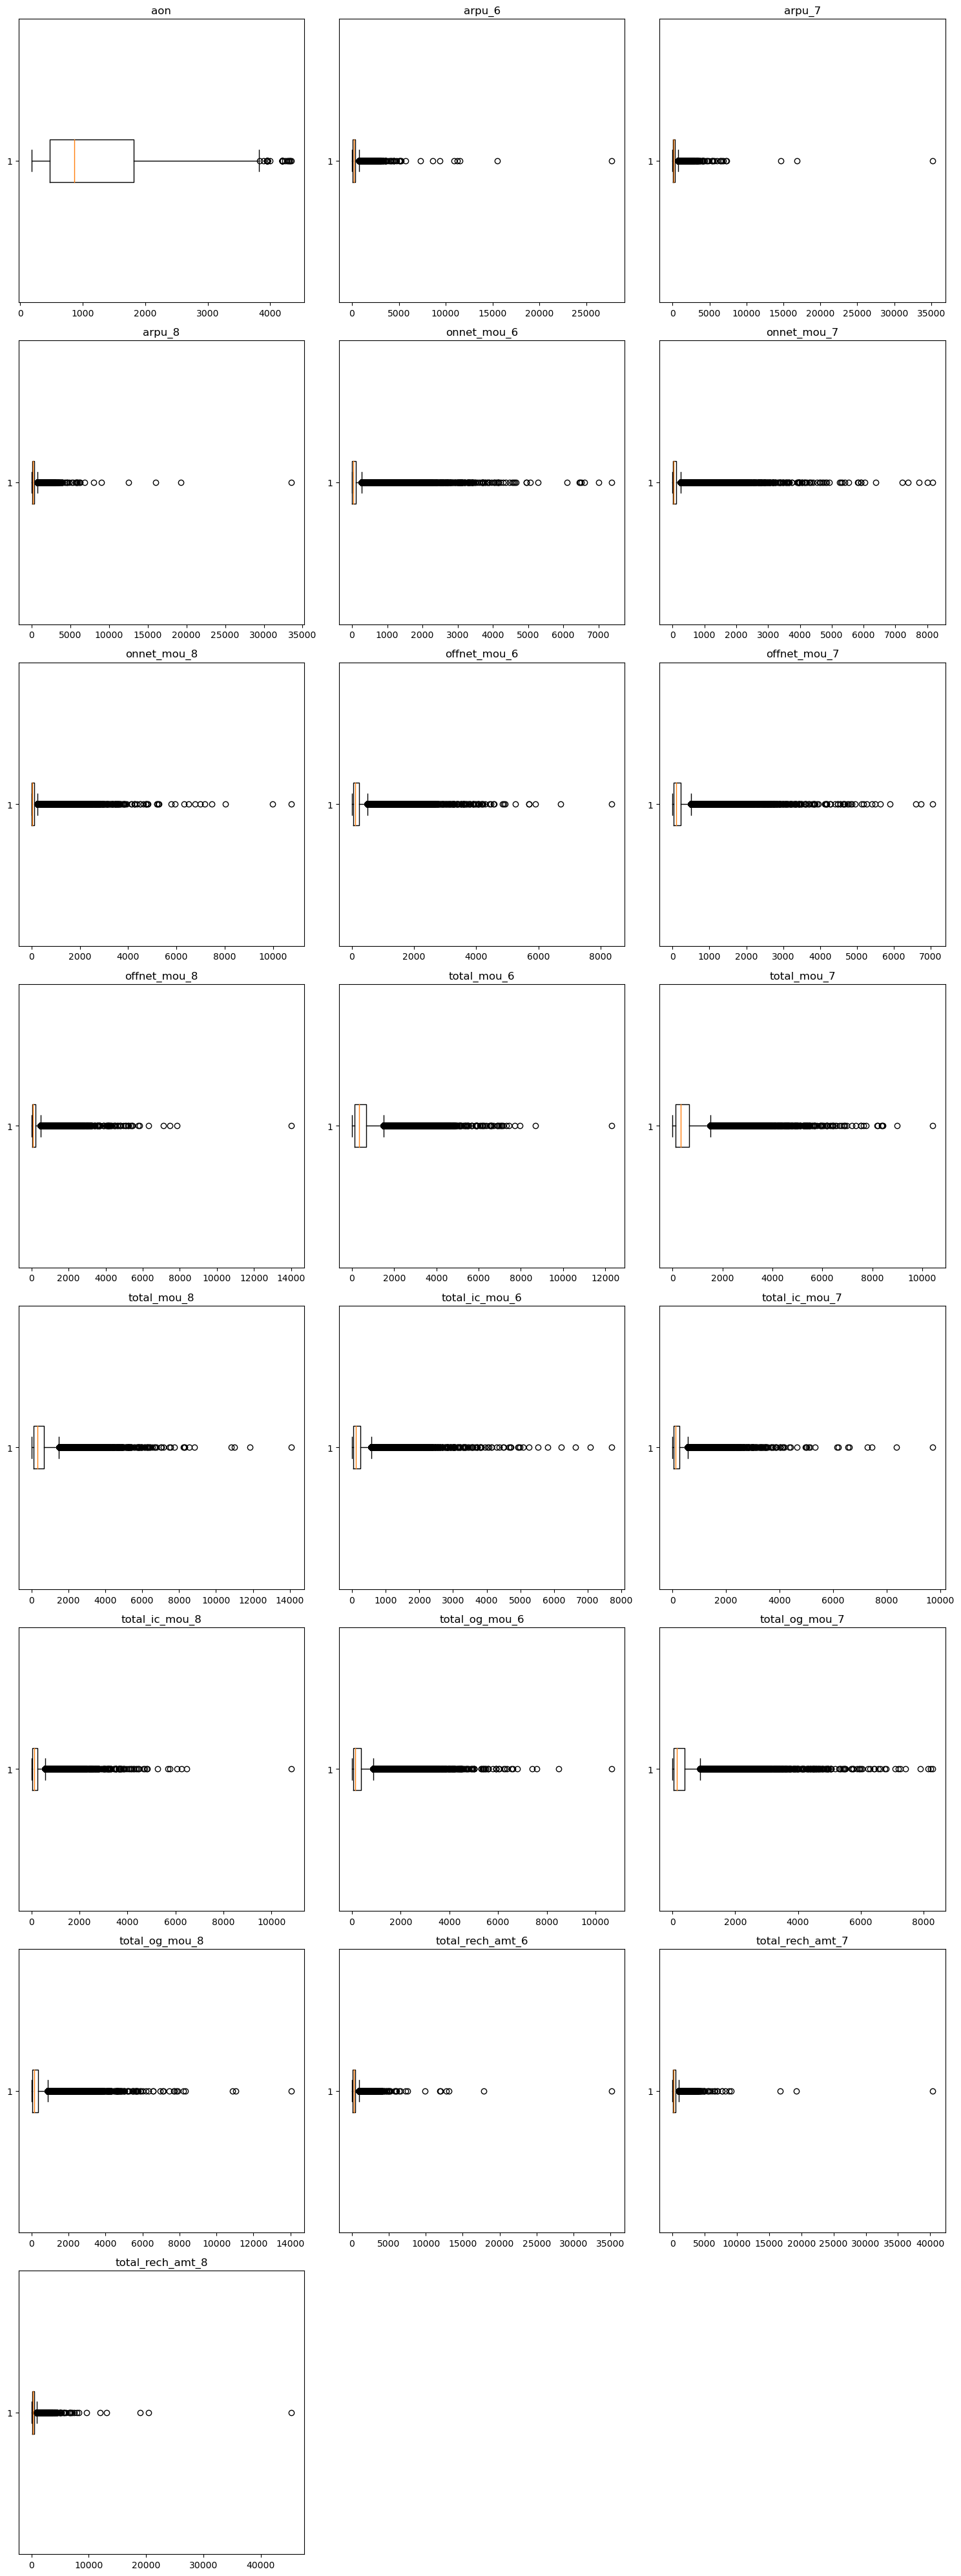

In [41]:
# Removing every outlier from the dataset would lead to significant loss of data.
# Hence we will be treating outliers for only those columns which are important for our analysis.

# We would be treating outliers for the following columns which would cover
# every customer's usage behaviour
outlier_cols = [
    "aon",
    "arpu_6",
    "arpu_7",
    "arpu_8",
    "onnet_mou_6",
    "onnet_mou_7",
    "onnet_mou_8",
    "offnet_mou_6",
    "offnet_mou_7",
    "offnet_mou_8",
    "total_mou_6",
    "total_mou_7",
    "total_mou_8",
    "total_ic_mou_6",
    "total_ic_mou_7",
    "total_ic_mou_8",
    "total_og_mou_6",
    "total_og_mou_7",
    "total_og_mou_8",
    "total_rech_amt_6",
    "total_rech_amt_7",
    "total_rech_amt_8",
]

# Calculate the number of rows needed to display 3 columns per row
num_cols = len(outlier_cols)
num_rows = (num_cols + 2) // 3  # Calculate number of rows (rounded up)

# Create a subplot with multiple box plots
fig, ax = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy iteration
ax = ax.flatten()

# Iterate through the column names and create box plots
for i, column in enumerate(outlier_cols):
    ax[i].boxplot(data[column], vert=False)
    ax[i].set_title(column)

# Hide any remaining empty subplots
for i in range(num_cols, num_rows * 3):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

In [42]:
data[outlier_cols].describe(percentiles=[0,0.01,0.1,0.2,0.25,0.5,0.75,0.8,0.9,0.95,0.99,0.995,0.9975])

,aon,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,total_mou_6,total_mou_7,total_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,1220.639709,283.259826,278.336341,278.921143,129.236765,129.993840,127.641721,194.825731,193.112523,191.002562,506.162076,512.450703,502.999098,199.710640,201.878029,198.486034,306.451436,310.572674,304.513065,328.139788,322.376363,323.846355
std,952.426321,333.888321,344.116418,351.847025,294.605405,305.867956,304.373330,311.131642,316.878225,316.270571,603.025457,614.878697,611.057312,290.114823,296.771338,288.336731,465.502866,479.131770,477.936832,404.211068,411.070120,426.181405
min,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0%,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,188.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,286.000000,32.248600,29.761200,18.210600,0.360000,0.250000,0.210000,7.960000,7.010000,6.480000,9.674000,13.166000,4.290000,2.160000,3.190000,0.960000,0.000000,0.298000,0.000000,0.000000,0.000000,0.000000
20%,401.000000,74.710600,69.075600,64.199200,4.810000,4.230000,4.260000,26.740000,24.510000,24.340000,86.530000,89.036000,78.182000,26.130000,28.430000,25.360000,28.172000,27.580000,22.240000,80.000000,65.000000,60.000000
25%,468.000000,93.581000,86.714000,84.095000,8.060000,7.260000,7.360000,36.880000,33.980000,34.390000,122.790000,124.370000,115.455000,38.640000,41.340000,38.290000,44.780000,42.910000,38.710000,110.000000,100.000000,90.000000
50%,868.000000,197.484000,191.588000,192.234000,34.110000,32.280000,32.100000,96.480000,91.885000,91.800000,321.910000,320.830000,316.010000,114.780000,116.330000,114.610000,145.280000,141.230000,138.360000,229.000000,220.000000,225.000000


We get these insights from the above charts & table -

1. 'aon' doesn't have outliers.
2. For all three months, 'arpu', 'total_mou' columns are the best presenters of outliers and removing their outliers will take care of outliers in other 'mou' type columns as well.
3. 'total_rech_amt' for all three months also have outliers.

Typically, outliers are occurring above 99% percetile values. The columns seem to have a steady trend till the 99th percentile and then sudden jump in the maximum values.
So we will drop outliers beyond 99th percentile for the above 3 column types. 

In [43]:
# updating num_cols and cat_cols column name list
num_cols = [col for col in data.columns if col not in (cat_cols + churn_col)]
cat_cols = cat_cols + churn_col

In [44]:
# Outlier Treatment functions
def outlier_filter(df, column):
    Q3 = df[column].quantile(0.9975)
    return ((df[column] <= Q3)) 

def remove_outliers(df, column):
    new_df = df[outlier_filter(df, column)]
    return new_df



In [45]:
Initial_count = len(data)

outlier_cols = [
    "arpu_6", "arpu_7", "arpu_8",
    "total_mou_6", "total_mou_7", "total_mou_8",
    "total_rech_amt_6", "total_rech_amt_7", "total_rech_amt_8",
]

for column in outlier_cols:
    data = remove_outliers(data, column)

# calculate percentage of data removed
print("Initial rows : ", Initial_count)
print("Final rows : ", len(data))
print("Percentage of data removed in total: ", round((1 - len(data)/Initial_count) * 100, 2), "%")


Initial rows :  69999
Final rows :  68436
Percentage of data removed in total:  2.23 %


In [46]:
# changing columns types
data[num_cols] = data[num_cols].apply(pd.to_numeric)
data[cat_cols] = data[cat_cols].apply(lambda column: column.astype("category"), axis=0)

In [47]:
unseen_cleaned.describe()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,total_mou_6,total_mou_7,total_mou_8,ratio_ic_og_6,ratio_ic_og_7,ratio_ic_og_8,action_rech_num_ratio,action_ic_mou_ratio,action_og_mou_ratio,action_arpu_ratio,only_ic_6,only_ic_7,only_ic_8
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.

## Treating Skewed data

In [48]:
cols_skew = [col for col in data[num_cols].columns if (data[col].skew() > 0.5 or data[col].skew() < -0.5) and col not in ['id', 'churn_probability']]
data[cols_skew].skew()

arpu_6                     1.699738
arpu_7                     1.650076
arpu_8                     1.616214
onnet_mou_6                4.702035
onnet_mou_7                4.494653
onnet_mou_8                4.501848
offnet_mou_6               3.754013
offnet_mou_7               3.673058
offnet_mou_8               3.523057
roam_ic_mou_6             18.639866
roam_ic_mou_7             30.760343
roam_ic_mou_8             29.427503
roam_og_mou_6             10.280325
roam_og_mou_7             12.008556
roam_og_mou_8             13.337951
loc_og_t2t_mou_6          10.776949
loc_og_t2t_mou_7          10.657054
loc_og_t2t_mou_8          10.170600
loc_og_t2m_mou_6           4.474258
loc_og_t2m_mou_7           4.123820
loc_og_t2m_mou_8           3.977430
loc_og_t2f_mou_6          12.533662
loc_og_t2f_mou_7          10.997348
loc_og_t2f_mou_8          12.344300
loc_og_t2c_mou_6          23.568968
loc_og_t2c_mou_7          45.883699
loc_og_t2c_mou_8          18.137943
loc_og_mou_6               4

In [49]:
unseen_cleaned[cols_skew].skew()

arpu_6                     5.201919
arpu_7                     6.213675
arpu_8                     5.723052
onnet_mou_6                6.187621
onnet_mou_7                6.172052
onnet_mou_8                6.011655
offnet_mou_6               5.523303
offnet_mou_7               6.252180
offnet_mou_8               7.338061
roam_ic_mou_6             94.466001
roam_ic_mou_7            118.409973
roam_ic_mou_8            100.001885
roam_og_mou_6             12.735574
roam_og_mou_7             14.190129
roam_og_mou_8             15.761770
loc_og_t2t_mou_6          13.763132
loc_og_t2t_mou_7          15.796798
loc_og_t2t_mou_8          14.884880
loc_og_t2m_mou_6           6.265027
loc_og_t2m_mou_7           6.708805
loc_og_t2m_mou_8           5.860894
loc_og_t2f_mou_6          35.313232
loc_og_t2f_mou_7          31.093696
loc_og_t2f_mou_8          19.689334
loc_og_t2c_mou_6          10.738356
loc_og_t2c_mou_7          18.648448
loc_og_t2c_mou_8          25.645547
loc_og_mou_6               5

In [50]:
data[cols_skew] = np.log1p(data[cols_skew])
unseen_cleaned[cols_skew] = np.log1p(unseen_cleaned[cols_skew])


In [51]:
data.skew()

id                        0.000334
arpu_6                   -1.816696
arpu_7                   -1.759689
arpu_8                   -1.687247
onnet_mou_6              -0.191383
onnet_mou_7              -0.147887
onnet_mou_8              -0.163173
offnet_mou_6             -0.902773
offnet_mou_7             -0.851717
offnet_mou_8             -0.883266
roam_ic_mou_6             2.585572
roam_ic_mou_7             3.166393
roam_ic_mou_8             3.189285
roam_og_mou_6             2.325614
roam_og_mou_7             2.852191
roam_og_mou_8             2.918270
loc_og_t2t_mou_6          0.105776
loc_og_t2t_mou_7          0.117076
loc_og_t2t_mou_8          0.098189
loc_og_t2m_mou_6         -0.554481
loc_og_t2m_mou_7         -0.551585
loc_og_t2m_mou_8         -0.566626
loc_og_t2f_mou_6          1.686091
loc_og_t2f_mou_7          1.687815
loc_og_t2f_mou_8          1.730498
loc_og_t2c_mou_6          2.948392
loc_og_t2c_mou_7          2.799869
loc_og_t2c_mou_8          2.713679
loc_og_mou_6        

# EDA

In [52]:
# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):

    if data_type(variable) == 'numerical':

        # Create a sub-plot for the distribution plot
        plt.figure(figsize=(8, 3))
        plt.subplot(1, 2, 1)
        sns.distplot(variable)
        plt.title(f'Distribution of {variable.name}')

        # sns.distplot(variable)


        if stats == True:

            # Create a sub-plot for the summary statistics
            plt.subplot(1, 2, 2)
            plt.axis('off')
            plt.table(cellText=variable.describe().reset_index().values, loc='center', cellLoc='center')
            plt.title(f'Summary Statistics of {variable.name}')

            # print(variable.describe())
        
        plt.show()
    
    elif data_type(variable) == 'categorical':
        
        plt.figure(figsize=(8, 3))
        sns.countplot(variable)
        plt.show()

        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate(var1, var2):

    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':

        # Create a sub-plot for the regression plot
        plt.figure(figsize=(8, 3))
        sns.regplot(x=var1, y=var2)
        plt.show()

    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        
        # Create a sub-plot for the regression plot
        plt.figure(figsize=(8, 3))
        sns.boxplot(x=var1, y=var2)
        plt.show()


In [53]:
data[num_cols].describe()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,total_mou_6,total_mou_7,total_mou_8,ratio_ic_og_6,ratio_ic_og_7,ratio_ic_og_8,action_rech_num_ratio,action_ic_mou_ratio,action_og_mou_ratio,action_arpu_ratio,only_ic_6,only_ic_7,only_ic_8
count,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.000000,68436.

## Univariate Analysis

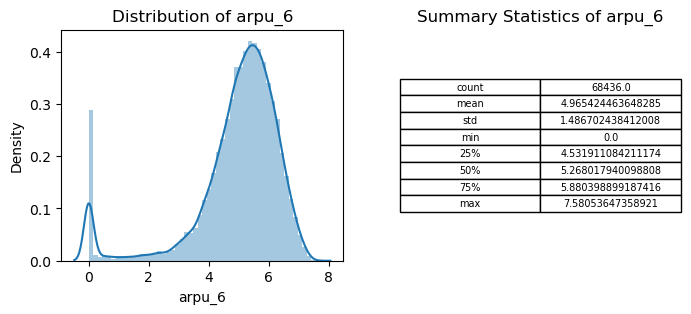

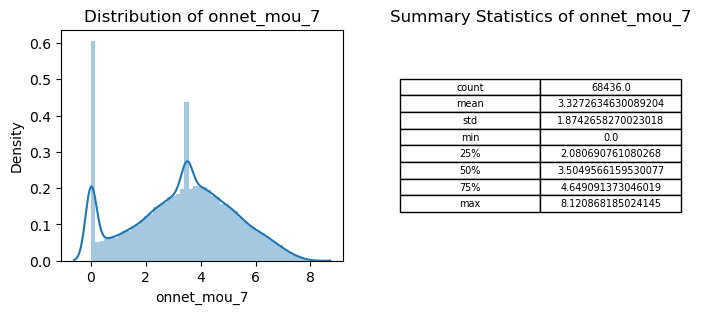

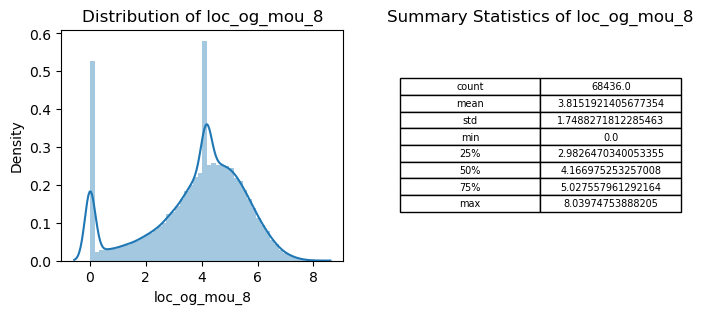

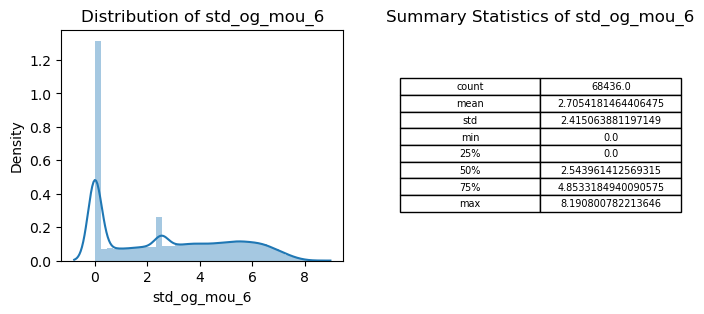

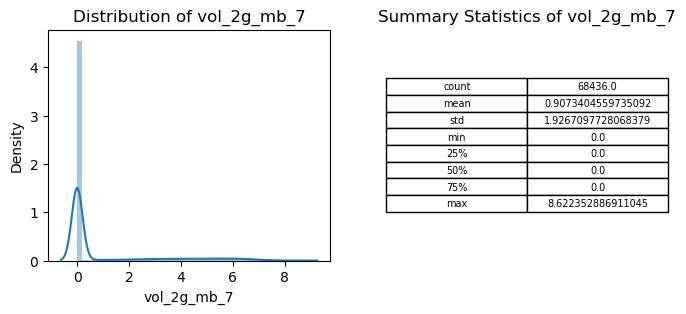

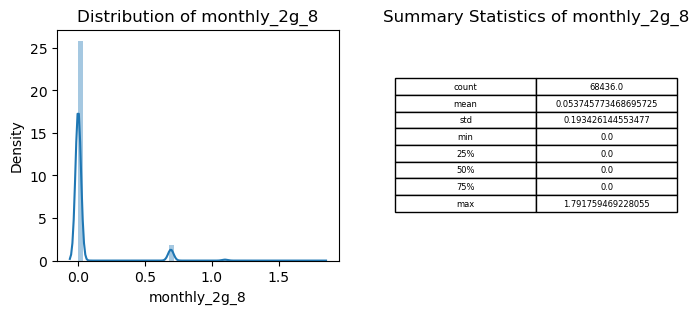

In [54]:
# Checking the univariate distribution of some of the numerical columns
# as showing all the columns will overload the notebook

for col in ['arpu_6', 'onnet_mou_7', 'loc_og_mou_8', 'std_og_mou_6', 'vol_2g_mb_7', 'monthly_2g_8']:
    univariate(data[col])


## Bivariate Analysis

Bivariate analysis of some of the important numerical columns with churn_probability


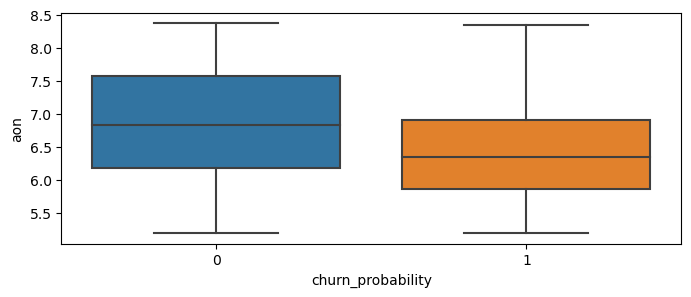

In [55]:
bivariate(data['churn_probability'], data['aon'])

In [56]:
median_cols = {
    "arpu" : ["arpu_6", "arpu_7", "arpu_8"],
    "std_og_t2m_mou" : ["std_og_t2m_mou_6", "std_og_t2m_mou_7", "std_og_t2m_mou_8"],
    "std_og_mou" : ["std_og_mou_6", "std_og_mou_7", "std_og_mou_8"],
    "total_og_mou" : ["total_og_mou_6", "total_og_mou_7", "total_og_mou_8"],

}

mean_cols = {
    "loc_og_t2f_mou" : ["loc_og_t2f_mou_6", "loc_og_t2f_mou_7", "loc_og_t2f_mou_8"],
    "std_og_t2f_mou" : ["std_og_t2f_mou_6", "std_og_t2f_mou_7", "std_og_t2f_mou_8"],
    "isd_og_mou" : ["isd_og_mou_6", "isd_og_mou_7", "isd_og_mou_8"],
    "std_ic_t2f_mou" : ["std_ic_t2f_mou_6", "std_ic_t2f_mou_7", "std_ic_t2f_mou_8"],
    "spl_ic_mou" : ["spl_ic_mou_6", "spl_ic_mou_7", "spl_ic_mou_8"],
    "isd_ic_mou" : ["isd_ic_mou_6", "isd_ic_mou_7", "isd_ic_mou_8"],
    "ic_others" : ["ic_others_6", "ic_others_7", "ic_others_8"],
    "total_rech_data" : ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8"],
    "max_rech_data" : ["max_rech_data_6", "max_rech_data_7", "max_rech_data_8"],
    "count_rech_2g" : ["count_rech_2g_6", "count_rech_2g_7", "count_rech_2g_8"],
    "count_rech_3g" : ["count_rech_3g_6", "count_rech_3g_7", "count_rech_3g_8"],
    "av_rech_amt_data" : ["av_rech_amt_data_6", "av_rech_amt_data_7", "av_rech_amt_data_8"],
    "vol_2g_mb" : ["vol_2g_mb_6", "vol_2g_mb_7", "vol_2g_mb_8"],
    "vol_3g_mb" : ["vol_3g_mb_6", "vol_3g_mb_7", "vol_3g_mb_8"],
    "monthly_2g" : ["monthly_2g_6", "monthly_2g_7", "monthly_2g_8"],
    "monthly_3g" : ["monthly_3g_6", "monthly_3g_7", "monthly_3g_8"],
    "sachet_2g" : ["sachet_2g_6", "sachet_2g_7", "sachet_2g_8"],
    "sachet_3g" : ["sachet_3g_6", "sachet_3g_7", "sachet_3g_8"],
}

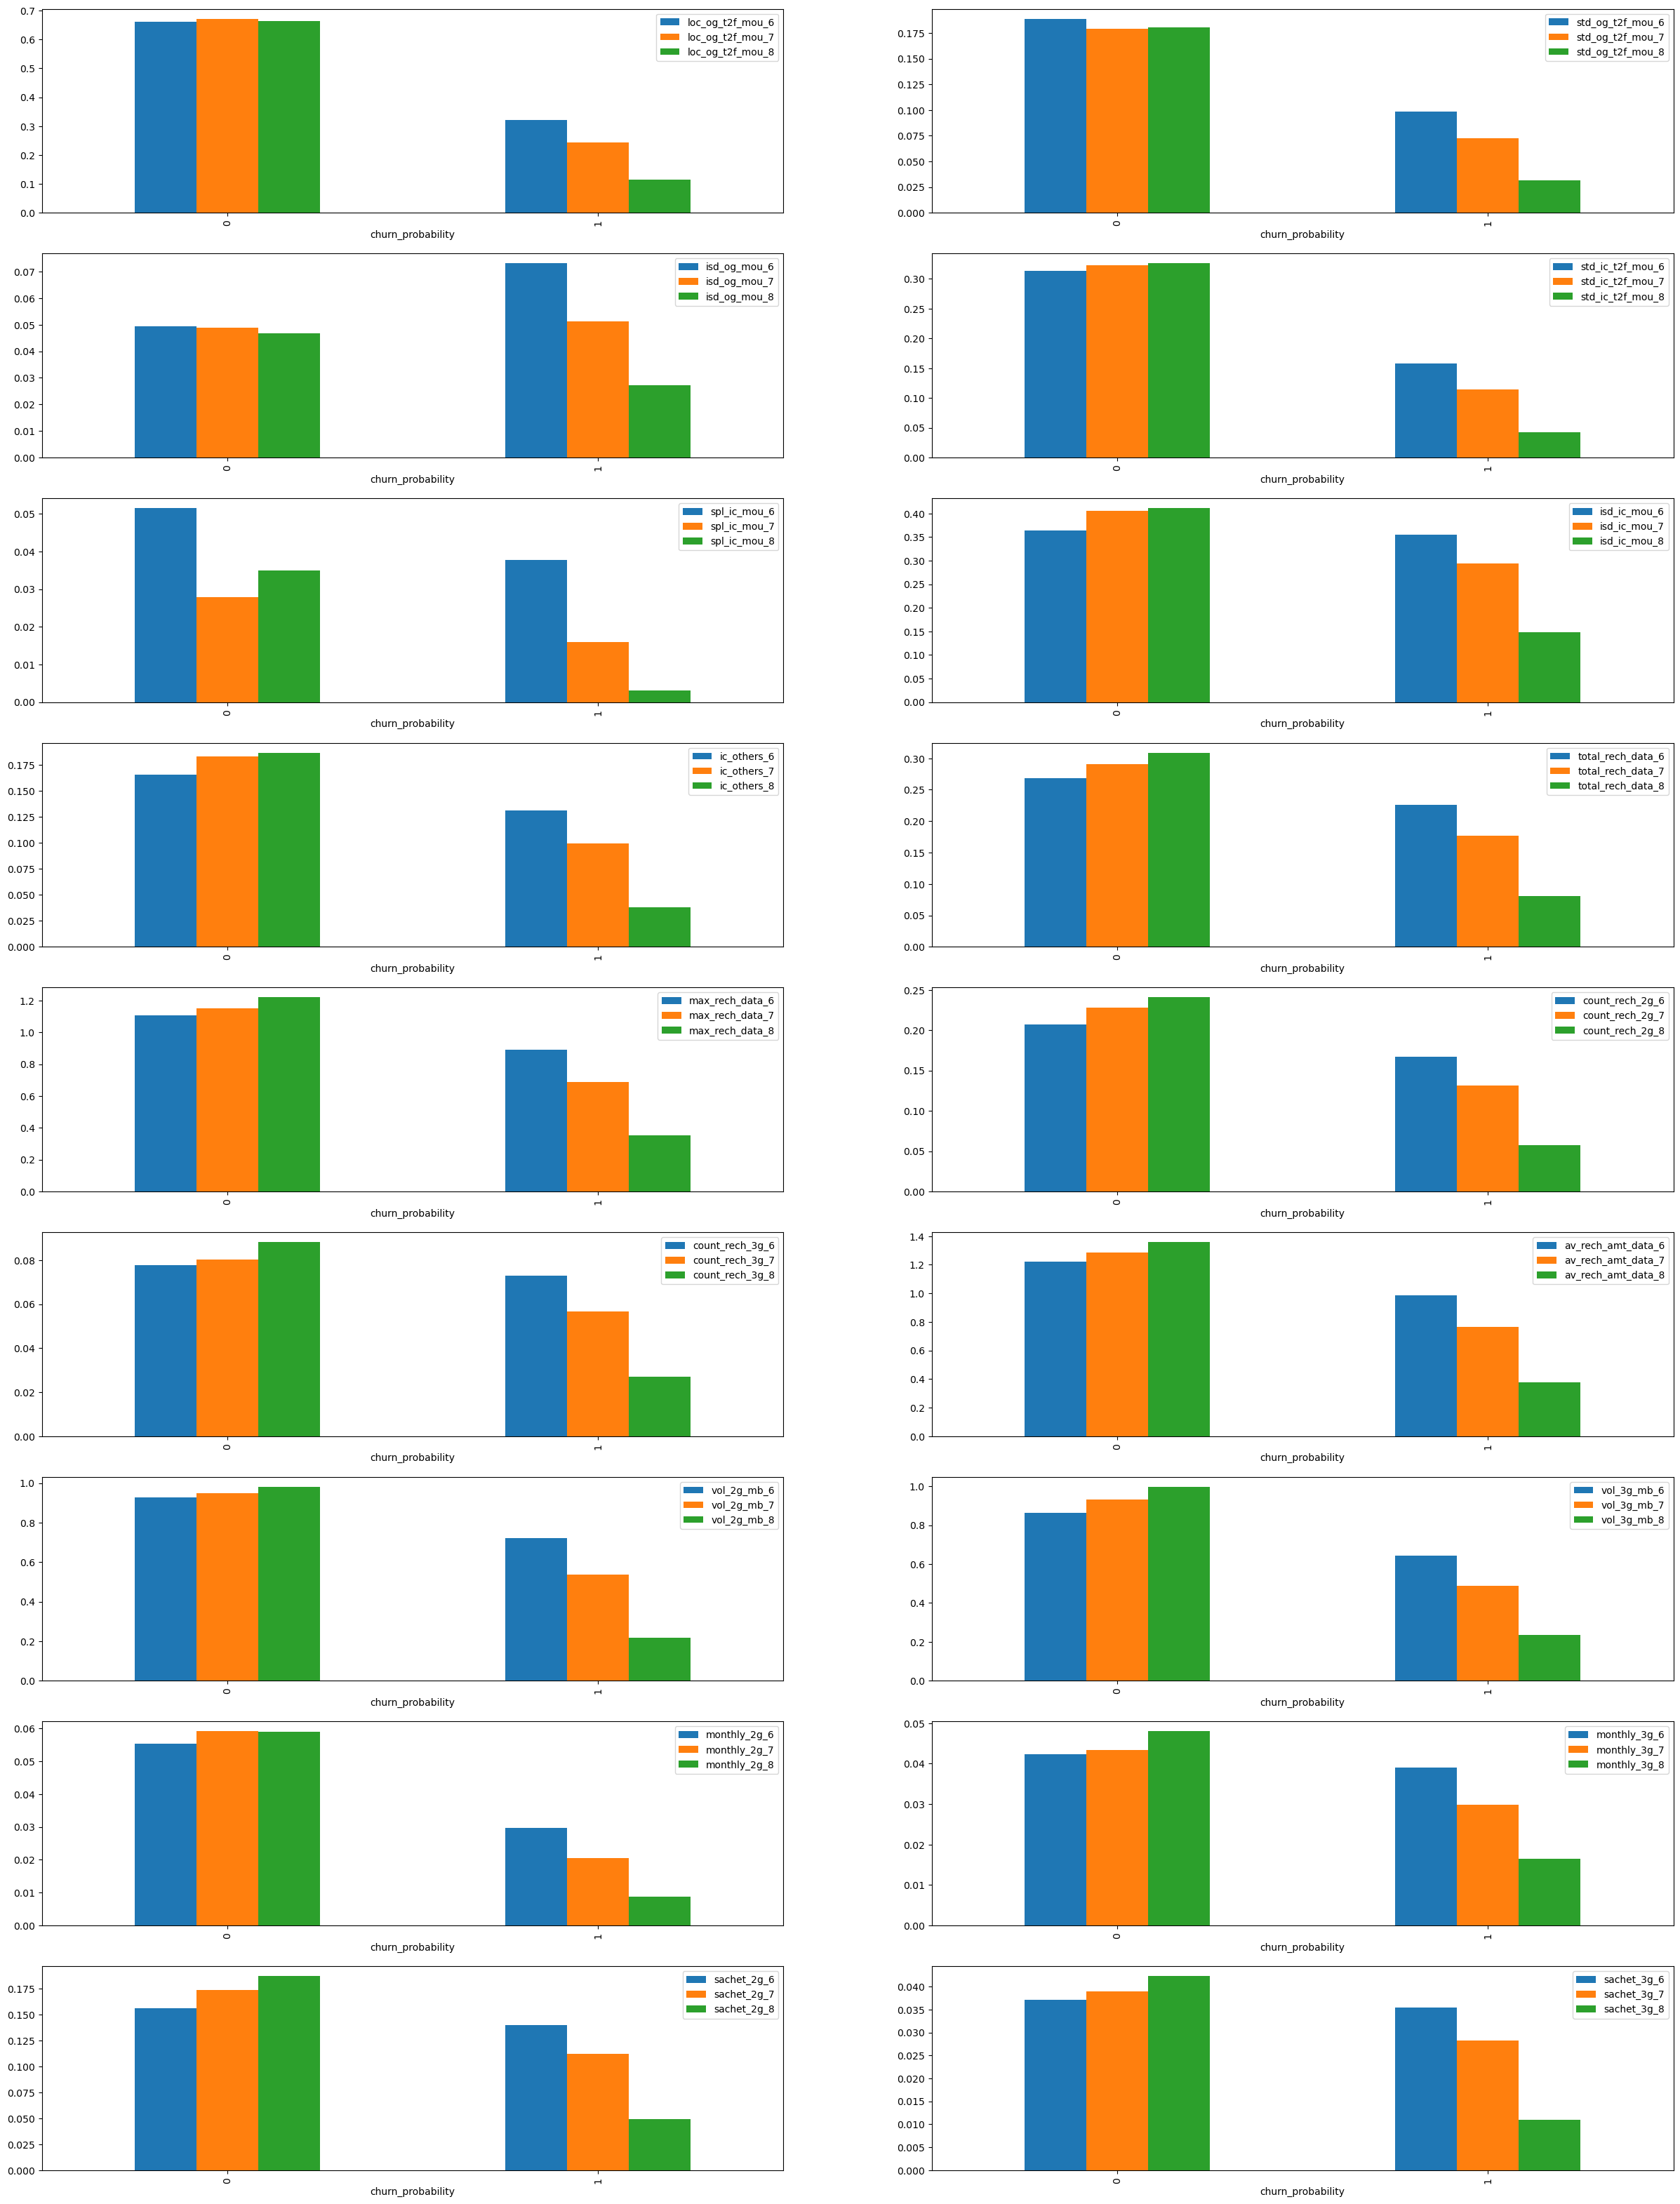

In [57]:
num_rows = 9
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 40))

for i, (category, columns) in enumerate(mean_cols.items()):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    data.groupby("churn_probability")[columns].mean().plot.bar(ax = ax)

plt.show()

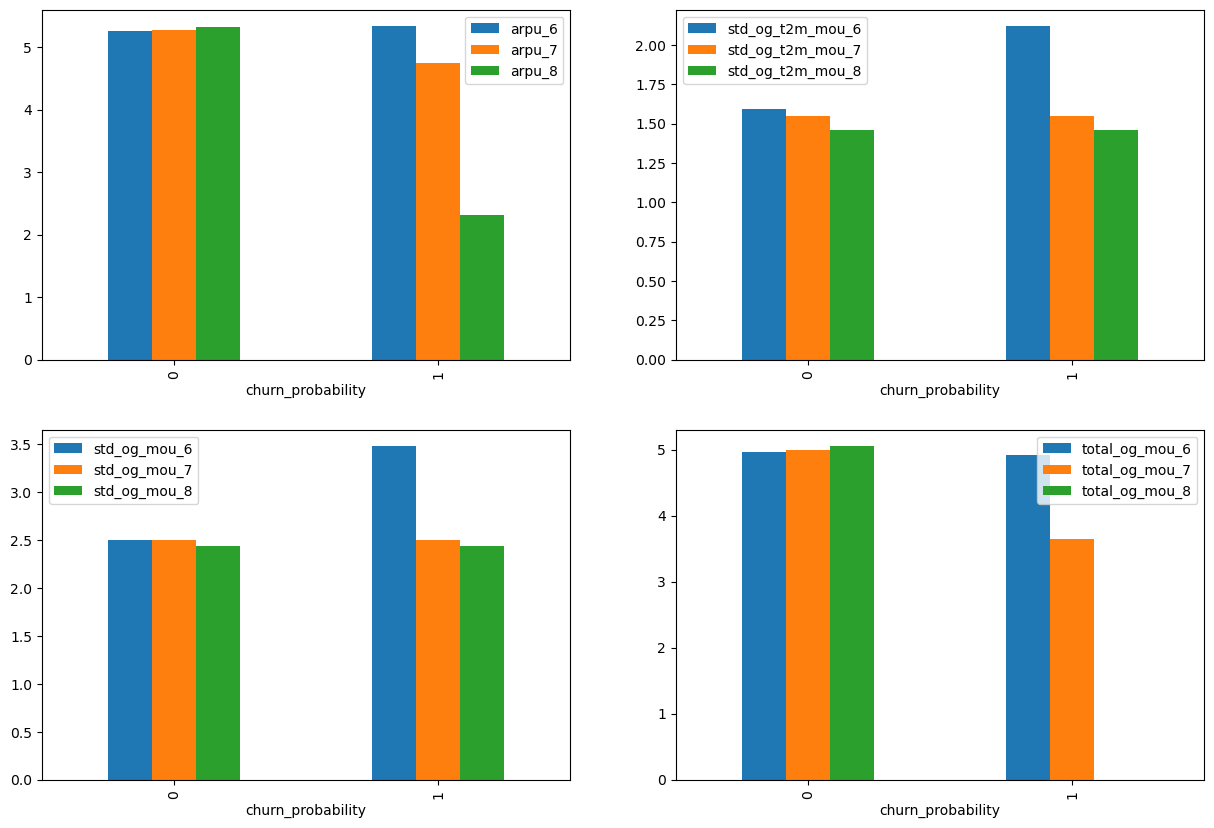

In [58]:
num_rows = 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i, (category, columns) in enumerate(median_cols.items()):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    data.groupby("churn_probability")[columns].median().plot.bar(ax = ax)

plt.show()

# Data Pre-processing

In [59]:
# changing churn_probability to numeric

data['churn_probability'] = pd.to_numeric(data['churn_probability'])

for col in cat_cols :
    if col != 'churn_probability':
        data[col] = data[col].astype('float64')


In [60]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68436 entries, 0 to 69998
Data columns (total 163 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    id                     int64  
 1    arpu_6                 float64
 2    arpu_7                 float64
 3    arpu_8                 float64
 4    onnet_mou_6            float64
 5    onnet_mou_7            float64
 6    onnet_mou_8            float64
 7    offnet_mou_6           float64
 8    offnet_mou_7           float64
 9    offnet_mou_8           float64
 10   roam_ic_mou_6          float64
 11   roam_ic_mou_7          float64
 12   roam_ic_mou_8          float64
 13   roam_og_mou_6          float64
 14   roam_og_mou_7          float64
 15   roam_og_mou_8          float64
 16   loc_og_t2t_mou_6       float64
 17   loc_og_t2t_mou_7       float64
 18   loc_og_t2t_mou_8       float64
 19   loc_og_t2m_mou_6       float64
 20   loc_og_t2m_mou_7       float64
 21   loc_og_t2m_mou_8       float64
 2

## Train-Test Split

In [61]:
# Train test split

X = data.drop('churn_probability', axis = 1)
y = data['churn_probability']

# Strtatified sampling as we have imbalanced data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42, stratify = y)

In [62]:
# print shapes of train and test sets
print("X_train : ", X_train.shape)
print("y_train : ", y_train.shape)
print("X_test : ", X_test.shape)
print("y_test : ", y_test.shape)

X_train :  (54748, 162)
y_train :  (54748,)
X_test :  (13688, 162)
y_test :  (13688,)


In [63]:
# Aggregating the categorical columns

train = pd.concat([X_train, y_train], axis=1)

for col in ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']:
    print(train.groupby(col)['churn_probability'].mean())


night_pck_user_6
-1.0    0.107422
 0.0    0.083846
 1.0    0.112094
Name: churn_probability, dtype: float64
night_pck_user_7
-1.0    0.113724
 0.0    0.066200
 1.0    0.064615
Name: churn_probability, dtype: float64
night_pck_user_8
-1.0    0.125502
 0.0    0.034017
 1.0    0.031469
Name: churn_probability, dtype: float64
fb_user_6
-1.0    0.107422
 0.0    0.109200
 1.0    0.082234
Name: churn_probability, dtype: float64
fb_user_7
-1.0    0.113724
 0.0    0.090909
 1.0    0.063680
Name: churn_probability, dtype: float64
fb_user_8
-1.0    0.125502
 0.0    0.068240
 1.0    0.029708
Name: churn_probability, dtype: float64


In [64]:
mapping = {}

# for col in ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']:
#     col_mapping = train.groupby(col)['churn_probability'].mean().to_dict()
#     # print(col_mapping)
#     mapping[col] = col_mapping

for col in ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']:

    aggregate_mean = train.groupby(col)['churn_probability'].mean().values

    mapping[col] = {
        -1: aggregate_mean[0],
        0: aggregate_mean[1],
        1: aggregate_mean[2]
    }

X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

In [65]:
# checking the data type of categorical columns - to make sure they are numeric
X_train[[col for col in cat_cols if col not in ['churn_probability']]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54748 entries, 55984 to 12081
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   night_pck_user_6  54748 non-null  float64
 1   night_pck_user_7  54748 non-null  float64
 2   night_pck_user_8  54748 non-null  float64
 3   fb_user_6         54748 non-null  float64
 4   fb_user_7         54748 non-null  float64
 5   fb_user_8         54748 non-null  float64
dtypes: float64(6)
memory usage: 2.9 MB


In [66]:
X_train.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,total_mou_6,total_mou_7,total_mou_8,ratio_ic_og_6,ratio_ic_og_7,ratio_ic_og_8,action_rech_num_ratio,action_ic_mou_ratio,action_og_mou_ratio,action_arpu_ratio,only_ic_6,only_ic_7,only_ic_8
55984,55984,4.991792,3.885925,5.168533,0.000000,0.392042,4.871986,0.000000,0.683097,4.008423,0.14842,2.143589,0.837248,0.0,0.900161,0.000000,0.000000,0.000000,4.321214,0.000000,0.000000,3.368674,0.000000,0.000000,2.262804,0.000000,0.000000,2.607124,0.000000,0.000000,4.717963,0.000000,0.000000,4.030517,0.000000,0.000000,1.763017,0.000000,0.000000,0.000000,0.000000,0.000000,4.113003,0.0,0.0,0.0,0.000000,0.000000,2.607124,0.000000,0.0,0.0,0.000000,0.000000,5.218408,0.000000,0.000000,3.675288,0.000000,0.000000,3.306520,0.000000,0.000000,1.043804,0.000000,0.000000,4.213756,0.000000,0.000000,0.896088,0.000000,0.000000,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,1.492904,0.000000,0.000000,4.264509,0.0,0.0,0.0,0.000000,0.000000,0.058269,0.000000,0.0,0.0,1.609438,1.609438,2.197225,5.135798,4.043051,5.908083,5.043425,3.433987,4.875197,0.000000,0.000000,4.875197,0.693147,0.0,0.693147,5.043425,0.0,3.258097,0.693147,0.0,0.693147,0.0,0.0,0.0,5.043425,0.0,3.258097,4.678049,0.0,0.029559,5.025655,0.0,4.663062,0.083846,0.113724,0.034017,0.693147,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.082234,0.113724,0.029708,8.117312,0.000000,3.501043,5.124916,3.766997,2.708050,3.847484,0.000000,0.000000,5.540361,0.000000,0.000000,0.323451,0.716662,0.299558,0.467027,0.483661,0.0,0.0,0.0
67728,67728,5.265593,5.748064,5.136798,2.249184,2.099244,2.473171,5.357482,5.887298,5.174906,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,2.249184,2.099244,2.473171,5.347012,5.866156,5.146098,0.955511,2.143589,1.793425,0.000000,0.000000,0.000000,5.393900,5.906968,5.234525,0.000000,0.000000,0.000000,0.476234,0.000000,0.000000,0.000000,0.000000,0.00

In [67]:
X_train.shape

(54748, 162)

## Scaling

- Will be used for getting the no. of pca_components

In [68]:
# Using Normalized scaler
scaler = MinMaxScaler()

# Applying fit and transform only on training set 
temp_X_train = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(temp_X_train, columns = X_train.columns)

temp_X_test = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(temp_X_test, columns = X_test.columns)

print("X_train_scaled : ", X_train_scaled.shape)
print("X_test_scaled : ", X_test_scaled.shape)

X_train_scaled :  (54748, 162)
X_test_scaled :  (13688, 162)


## Class Imbalance using SMOTE

In [69]:
smote = SMOTE(random_state=42)
X_train_resample, y_train_resample = smote.fit_resample(X_train_scaled, y_train)


## PCA Analysis

In [70]:
pca = PCA(random_state=42)  

pca.fit(X_train_resample)

PCA(random_state=42)

In [71]:
pca.components_

array([[ 1.52972953e-04,  5.39575606e-02,  1.39873910e-01, ...,
        -5.25829630e-03, -9.22358021e-03, -7.98525498e-03],
       [ 3.63897290e-03, -2.07593311e-02, -3.12029920e-02, ...,
         3.06417738e-02,  3.26564616e-02,  3.01413661e-02],
       [-7.00409407e-03,  1.76170495e-01,  3.06733423e-02, ...,
        -2.32386363e-02, -5.98429508e-03,  5.73633125e-03],
       ...,
       [ 1.68653166e-05,  1.95499682e-04, -2.51833740e-04, ...,
        -1.14562827e-03,  5.48390792e-04, -2.58883327e-04],
       [ 3.23702655e-05,  3.75005032e-05, -4.15733974e-04, ...,
         1.22506093e-04, -1.15880206e-04, -1.73188408e-04],
       [-4.69986944e-06, -2.37957439e-04, -2.61848826e-04, ...,
         3.74041055e-04,  1.57375065e-04,  1.10010465e-04]])

In [72]:
pca.explained_variance_ratio_

array([2.26268034e-01, 1.61115413e-01, 8.49493038e-02, 7.58782073e-02,
       4.46492478e-02, 4.02218779e-02, 3.26168703e-02, 2.44577860e-02,
       2.37158387e-02, 1.86609167e-02, 1.75979602e-02, 1.51467042e-02,
       1.44283792e-02, 1.30979304e-02, 1.15912606e-02, 9.98435621e-03,
       8.59878053e-03, 8.16934693e-03, 6.83590173e-03, 6.63926793e-03,
       6.32855134e-03, 5.96863843e-03, 5.80305617e-03, 5.76168837e-03,
       5.08204519e-03, 4.97624298e-03, 4.78167875e-03, 4.69660533e-03,
       4.32529797e-03, 4.01044714e-03, 3.78389810e-03, 3.76270333e-03,
       3.47419643e-03, 3.28047719e-03, 3.06644105e-03, 2.84028800e-03,
       2.75497495e-03, 2.65998094e-03, 2.56590169e-03, 2.51397647e-03,
       2.46560394e-03, 2.41680970e-03, 2.34313399e-03, 2.29161681e-03,
       2.20319452e-03, 1.97366681e-03, 1.89006349e-03, 1.85389731e-03,
       1.80428455e-03, 1.69894216e-03, 1.63552092e-03, 1.57622677e-03,
       1.54537261e-03, 1.48786027e-03, 1.42884648e-03, 1.41161665e-03,
      

In [73]:
# perform the cumulative sum of explained variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)

#Convert explained variance to DataFrame
var_cumu_df = pd.DataFrame({"Variance":var_cumu}) 
var_cumu_df.head()

,Variance
0,0.226268
1,0.387383
2,0.472333
3,0.548211
4,0.592860


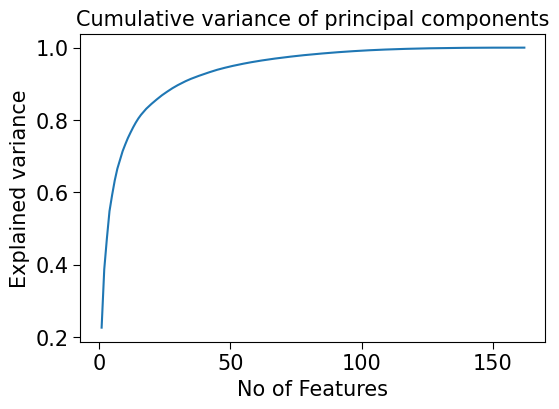

In [74]:
# Plot the cumulative explained variance : SCREE Plot
plt.figure(figsize=[6,4])
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.title("Cumulative variance of principal components", size=15)
plt.ylabel("Explained variance", size=15)
plt.xlabel("No of Features", size=15)
plt.tick_params(size=5, labelsize = 15) # Tick size in both X and Y axes


In [75]:
# By providing variance value we can also get the suitable principal components.

cumu_var = [0.90, 0.92, 0.95, 0.98, 0.99, 0.995] # variance value
possible_pca_components = [] # empty list to store the no. of components for given variance
print("No. of components for given variance: \n")
for var in cumu_var:
    pca_check = PCA(var, random_state=42)
    X_train_pca_check = pca_check.fit_transform(X_train_scaled)
    print(f"{100*var}% of variance: {X_train_pca_check.shape[1]} components")
    possible_pca_components.append(X_train_pca_check.shape[1])
print("\nPosible no. of pca_components : ", possible_pca_components)


No. of components for given variance: 

90.0% of variance: 36 components
92.0% of variance: 43 components
95.0% of variance: 58 components


98.0% of variance: 85 components
99.0% of variance: 100 components
99.5% of variance: 114 components

Posible no. of pca_components :  [36, 43, 58, 85, 100, 114]


# Model Building

- Logistic Regression
- Decision Tree
- Random Forest
- XGBoost

## Helpful Functions for Model Building

In [76]:
# Calculate the metrics
def calculate_model_peformance(model_name, y_test, y_pred, pred_prob):
        
    precision = precision_score(y_test, y_pred)

    recall = recall_score(y_test, y_pred)

    f1_Score = f1_score(y_test, y_pred)

    accuracy = accuracy_score(y_test, y_pred)

    roc_auc = roc_auc_score(y_test, pred_prob)

    return pd.DataFrame({"Model":[model_name], "Accuracy": [accuracy], "Precision":[precision], "Recall":[recall],
                         "f1_score":[f1_Score], "ROC_AUC":[roc_auc]})


# Function to predict the values from the optimal model obtained from Hyperparameter tuning
def get_model_predictions(model_name, optimal_model, X_train, y_train, X_test, y_test):

    # Predict churn on test data
    pred = optimal_model.predict(X_test)

    # Predict probabilities on test data
    pred_prob = optimal_model.predict_proba(X_test)[:, 1]

    # Model Name
    print("\n" + model_name + " : ")

    # Print train & test scores
    print("\n Train score : ", optimal_model.score(X_train, y_train))
    print("\n Test score : ", optimal_model.score(X_test, y_test))

    # create Confusion matrix
    cm = confusion_matrix(y_test, pred)
    print("\n Confusion matrix : \n", cm)

    # Model performance
    model_results = calculate_model_peformance(model_name, y_test, pred, pred_prob)

    global models_score_accuracy
    # Append model results to models_score dataframe
    models_score_accuracy = models_score_accuracy.append(model_results)
  


# Finding optimal value of individual hyperparameters
def find_optimal_hp_value(model_name, model, params, X_train, y_train):

    folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)

    grid_model = GridSearchCV(estimator=model, cv=folds, param_grid=params,
                               scoring="accuracy", n_jobs=-1, verbose=1, return_train_score=True)
    
    grid_model.fit(X_train, y_train)

    print(f"\nBest value of " + {list(params.keys()[0])} + " : ", next(iter(grid_model.best_params_.values())) )
    
    # plotting accuracy with the param
    scores = grid_model.cv_results_
    plt.figure(figsize=(6,4))
    plt.plot(
        scores[f"param_{list(params.keys())[0]}"], # Param values
        scores["mean_train_score"], 
        label="Training accuracy"
    )
    plt.plot(
        scores[f"param_{list(params.keys())[0]}"], 
        scores["mean_test_score"], 
        label="Test accuracy")
    plt.xlabel(f"{list(params.keys())[0]}")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()



# Pipelined optuna funtion to find optimal hyperparameters
def optimise_and_evaluate_pipeline(model_name, model, model_params, X_train, y_train, X_test, y_test, n_trials=100, pca_components_given=False, pca_components=None):

    # Setting the logging level WARNING, the INFO logs are suppressed.
    optuna.logging.set_verbosity(optuna.logging.WARNING)
    
    def objective(trial):
        # Create a new pipeline inside the objective function

        if pca_components_given:
            pipeline = imbPipeline([
                ("pca", PCA(n_components=pca_components, random_state=42)), 
                ("model", model)  
            ])
        else:
            pipeline = imbPipeline([
               ("model", model)
            ])
        
        
        # Set the hyperparameters
        for param_name, param_value in model_params.items():
            if param_name in ["n_estimators", "max_depth", "min_samples_split", 
                              "min_samples_leaf", "max_leaf_nodes", "gamma", "max_iter"]:
                setattr(pipeline.named_steps["model"], param_name, trial.suggest_int(param_name, param_value[0], param_value[1], param_value[2]))
            elif param_name in ["learning_rate", "subsample"]:
                setattr(pipeline.named_steps["model"], param_name, trial.suggest_float(param_name, param_value[0], param_value[1]))
            elif param_name in ["criterion", "max_features", "loss", "C", "penalty"]:
                setattr(pipeline.named_steps["model"], param_name, trial.suggest_categorical(param_name, param_value))
            else:
                raise ValueError("Unsupported parameter type")
         
        # Fit the pipeline
        pipeline.fit(X_train, y_train)

        # Make predictions and calculate accuracy on the test set
        y_pred = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        return accuracy

    # Create an Optuna study and run the optimization process
    study = optuna.create_study(direction="maximize")  # Maximize accuracy
    study.optimize(objective, n_trials=n_trials)

    # Get the best trial and hyperparameters
    best_trial = study.best_trial
    best_params = {key: best_trial.params[key] for key in model_params.keys()}

    print("\nBest Hyperparameters for the " + model_name + " are : \n", best_params)

    # Create the final pipeline with the best PCA component
    if pca_components_given:
        final_pipeline = imbPipeline([
            ("pca", PCA(n_components=pca_components, random_state=42)), 
            ("model", model) 
        ])
    else:
        final_pipeline = imbPipeline([
            ("model", model)
        ])

    # Set the hyperparameters based on the best trial
    for param_name, param_value in best_params.items():
        setattr(final_pipeline.named_steps["model"], param_name, param_value)

    # Fit the final pipeline
    final_pipeline.fit(X_train, y_train)

    return final_pipeline




In [77]:
# Creating a DataFrame which stores all the test score for each model
models_score_accuracy = pd.DataFrame({"Model":[None], "Accuracy":[None],"Precision":[None],"Recall":[None],"f1_score":[None],"ROC_AUC":[None]})
models_score_accuracy = models_score_accuracy.dropna()

## Benchmark Model

- We will start with a benchmark model which will be a simple logistic regression model with default parameters. We will use this model to compare the performance of our other models.

In [125]:
%%time

# Benchmark_LR_model

benchmark_model = LogisticRegression(random_state=42)

benchmark_model.fit(X_train_resample, y_train_resample)

get_model_predictions("Bechmark Model - LR", benchmark_model, X_train_resample, y_train_resample, X_test, y_test)

models_score_accuracy


Bechmark Model - LR : 

 Train score :  0.8791992028631853

 Test score :  0.36557568673290475

 Confusion matrix : 
 [[3740 8555]
 [ 129 1264]]
CPU times: total: 14.5 s
Wall time: 3.92 s


,Model,Accuracy,Precision,Recall,f1_score,ROC_AUC
0,Bechmark Model - LR,0.365576,0.12873,0.907394,0.225473,0.636662


From the above benchmark model we got a fair idea of benchmark metrics. 
Any model which would improve the recall while maintaining accuracy & precision would be a good model.
Now we will try to improve the metrics by using other complex models.

From the PCA Analysis we can infer : 


- 90.0% of variance: 36 components

- 92.0% of variance: 43 components

- 95.0% of variance: 58 components

- 98.0% of variance: 85 components

- 99.0% of variance: 100 components

- 99.5% of variance: 114 components

## Logistic Regression

Fitting 3 folds for each of 14 candidates, totalling 42 fits



Best value of max_iter: 100


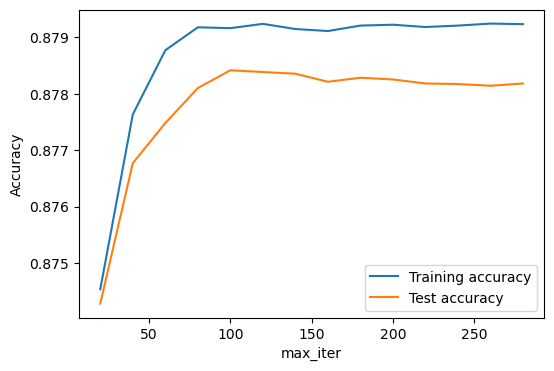

Fitting 3 folds for each of 5 candidates, totalling 15 fits

Best value of C: 5


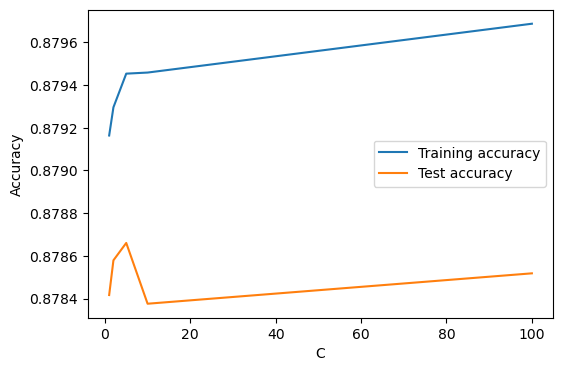

CPU times: total: 28.9 s
Wall time: 3min 36s


In [140]:
%%time

params ={
    'max_iter':range(20,300,20),
    'C':[1,2,5,10,100]
}


for param in params:
    find_optimal_hp_value(
        "Logistic Regression", LogisticRegression(random_state=42), 
        {param: params[param]}, X_train_resample, y_train_resample
    )



In [126]:
%%time

# Hyperparameter tuning for Logistic Regression

lr_params = {
    'max_iter':range(80,130,10),
    'C':[2, 3, 4, 5, 6, 7, 8],
}

lr_model = LogisticRegression(random_state=42)

print("\n\nLogistic Regression Model")

lr_pca_list = [36, 43, 58]

for pca in lr_pca_list:

    print(f"\n\nPCA - {pca} : \n")

    lr_model_pca = get_optimal_model(f"Logistic Regression PCA - {pca}", LogisticRegression(random_state=42),
                                      lr_params, pca, X_train_resample, y_train_resample)

    get_model_predictions(f"Logistic Regression PCA - {pca}", lr_model_pca, X_train_resample, y_train_resample, X_test, y_test)
    
    print("\n\n" + "*"*70 + "\n")

models_score_accuracy




Logistic Regression Model


PCA - 36 : 

Fitting 3 folds for each of 35 candidates, totalling 105 fits



Best Hyperparameters for the Logistic Regression PCA - 36 are : 
 {'C': 3, 'max_iter': 80}

Logistic Regression PCA - 36 : 

 Train score :  0.86812672848544

 Test score :  0.8985242548217417

 Confusion matrix : 
 [[12293     2]
 [ 1387     6]]


**********************************************************************



PCA - 43 : 

Fitting 3 folds for each of 35 candidates, totalling 105 fits

Best Hyperparameters for the Logistic Regression PCA - 43 are : 
 {'C': 3, 'max_iter': 80}

Logistic Regression PCA - 43 : 

 Train score :  0.8686656092402798

 Test score :  0.8982320280537697

 Confusion matrix : 
 [[12293     2]
 [ 1391     2]]


**********************************************************************



PCA - 58 : 

Fitting 3 folds for each of 35 candidates, totalling 105 fits

Best Hyperparameters for the Logistic Regression PCA - 58 are : 
 {'C': 5, 'max_iter': 80}

Logistic Regression PCA - 58 : 

 Train score :  0.8698247112412559

 Test score :  0.9007890122735243

 Co

,Model,Accuracy,Precision,Recall,f1_score,ROC_AUC
0,Bechmark Model - LR,0.365576,0.12873,0.907394,0.225473,0.636662
0,Logistic Regression PCA - 36,0.898524,0.75000,0.004307,0.008565,0.533514
0,Logistic Regression PCA - 43,0.898232,0.50000,0.001436,0.002863,0.505008
0,Logistic Regression PCA - 58,0.900789,0.79661,0.033740,0.064738,0.688489


## Decision Tree

Fitting 3 folds for each of 18 candidates, totalling 54 fits



Best value of max_depth: 16


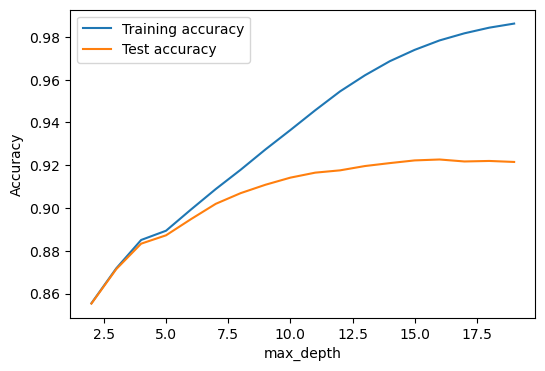

Fitting 3 folds for each of 79 candidates, totalling 237 fits

Best value of min_samples_split: 5


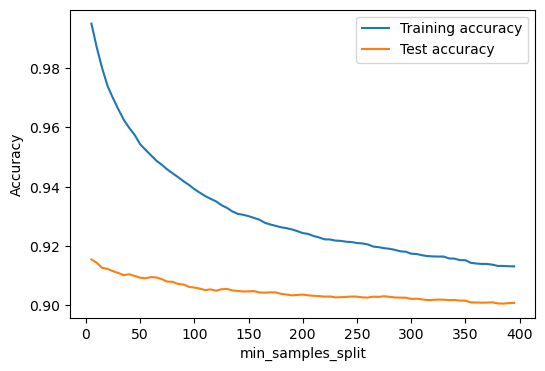

Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best value of min_samples_leaf: 5


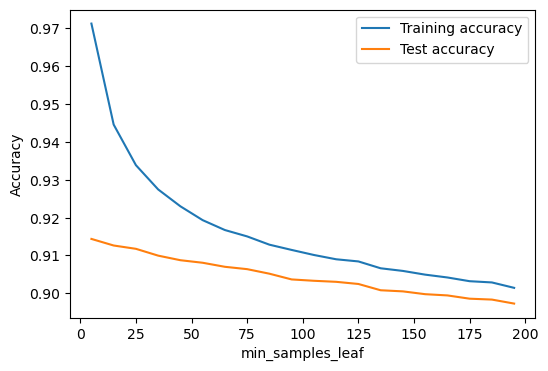

Fitting 3 folds for each of 8 candidates, totalling 24 fits

Best value of max_leaf_nodes: 180


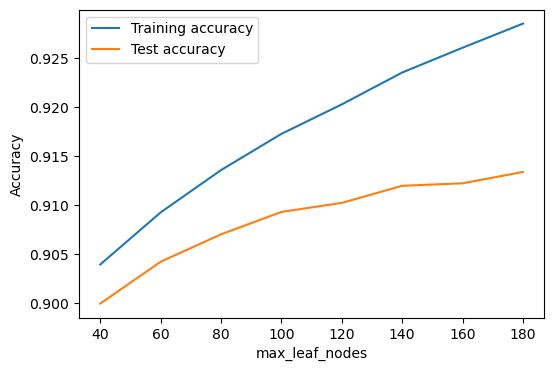

CPU times: total: 2min 2s
Wall time: 26min 40s


In [126]:
%%time

params ={
    'max_depth' : range(2,20,1),
    'min_samples_split' : range(5,400,5),
    'min_samples_leaf' : range(5,200,10),
    'max_leaf_nodes' : range(40, 200, 20),
}



for param in params:
    find_optimal_hp_value(
        "Decision Tree", DecisionTreeClassifier(random_state=42), 
        {param: params[param]}, X_train_resample, y_train_resample
    )



In [127]:

# Define the hyperparameters and their search ranges
model_params = {
    "max_depth": (2, 10, 1),
    "min_samples_split": (150, 350, 25),
    "min_samples_leaf": (50, 200, 25),
    'max_leaf_nodes' : (40, 180, 20),
    'max_features' : ['auto'],
    'criterion' : ['gini', 'entropy']
}

# Create a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Optimizing & evaluating the DT model on various paramters

# 1. On basic DT Model

dt_model_base = dt_model

dt_model_base.fit(X_train_resample, y_train_resample)

get_model_predictions("Decision Tree Base", dt_model_base, X_train_resample, y_train_resample, X_test, y_test)

# Separation line
print("\n\n" + "*"*70 + "\n")


# 2. On Pipelined Optuna Model without pca_components

dt_hpt_pipelined_model = optimise_and_evaluate_pipeline("Decision Tree HPT Pipelined", dt_model, model_params, 
                                                        X_train_resample, y_train_resample, X_test, y_test, n_trials=100, pca_components_given=False)

get_model_predictions("Decision Tree HPT Pipelined", dt_hpt_pipelined_model, X_train_resample, y_train_resample, X_test, y_test)

# Separation line
print("\n\n" + "*"*70 + "\n")

# 3. On Pipelined Optuna Model with varied pca_components
dt_pca_list = [36, 43, 58]

for pca in dt_pca_list:

    dt_hpt_pipelined_model_pca = optimise_and_evaluate_pipeline(f"Decision Tree HPT PCA - {pca}", dt_model, model_params, 
                                                                X_train_resample, y_train_resample, X_test, y_test, n_trials=100, 
                                                                pca_components_given=True, pca_components=pca)

    get_model_predictions(f"Decision Tree HPT PCA - {pca}", dt_hpt_pipelined_model_pca, X_train_resample, y_train_resample, X_test, y_test)

    print("\n\n" + "*"*70 + "\n")


models_score_accuracy


Decision Tree Base : 

 Train score :  1.0

 Test score :  0.5463909994155465

 Confusion matrix : 
 [[7138 5157]
 [1052  341]]


**********************************************************************


Best Hyperparameters for the Decision Tree HPT Pipelined are : 
 {'max_depth': 7, 'min_samples_split': 300, 'min_samples_leaf': 150, 'max_leaf_nodes': 120, 'max_features': 'auto', 'criterion': 'entropy'}

Decision Tree HPT Pipelined : 

 Train score :  0.8416910688140556

 Test score :  0.9299386323787259

 Confusion matrix : 
 [[11833   462]
 [  497   896]]


**********************************************************************


Best Hyperparameters for the Decision Tree HPT PCA - 36 are : 
 {'max_depth': 4, 'min_samples_split': 250, 'min_samples_leaf': 200, 'max_leaf_nodes': 100, 'max_features': 'auto', 'criterion': 'entropy'}

Decision Tree HPT PCA - 36 : 

 Train score :  0.7596591833414674

 Test score :  0.8982320280537697

 Confusion matrix : 
 [[12295     0]
 [ 1393     0]]



,Model,Accuracy,Precision,Recall,f1_score,ROC_AUC
0,Bechmark Model - LR,0.365576,0.128730,0.907394,0.225473,0.636662
0,Logistic Regression PCA - 36,0.898524,0.750000,0.004307,0.008565,0.533514
0,Logistic Regression PCA - 43,0.898232,0.500000,0.001436,0.002863,0.505008
0,Logistic Regression PCA - 58,0.900789,0.796610,0.033740,0.064738,0.688489
0,Decision Tree Base,0.546391,0.062023,0.244795,0.098970,0.412678
0,Decision Tree HPT Pipelined,0.929939,0.659794,0.643216,0.651399,0.879829
0,Decision Tree HPT PCA - 36,0.898232,0.000000,0.000000,0.000000,0.500962
0,Decision Tree HPT PCA - 43,0.898232,0.000000,0.000000,0.000000,0.500875
0,Decision Tree HPT PCA - 58,0.898232,0.000000,0.000000,0.000000,0.498363


## Random Forest

Fitting 3 folds for each of 9 candidates, totalling 27 fits

Best value of max_depth: 18


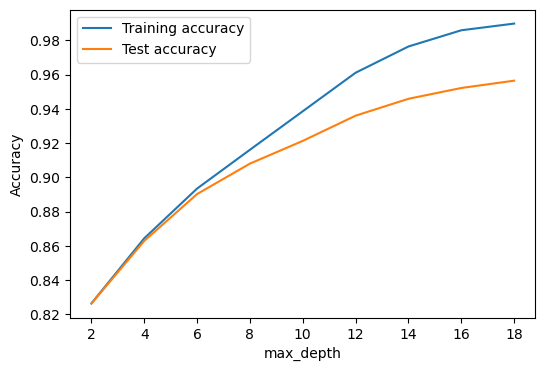

Fitting 3 folds for each of 39 candidates, totalling 117 fits

Best value of min_samples_split: 10


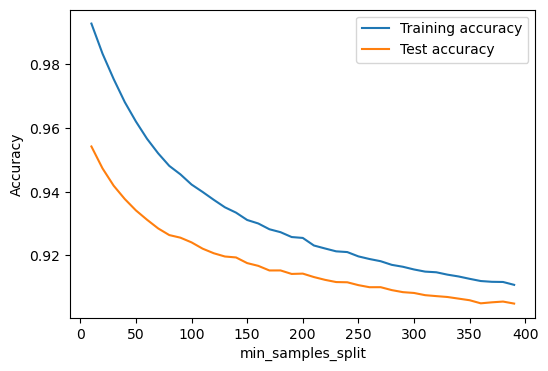

Fitting 3 folds for each of 24 candidates, totalling 72 fits

Best value of min_samples_leaf: 10


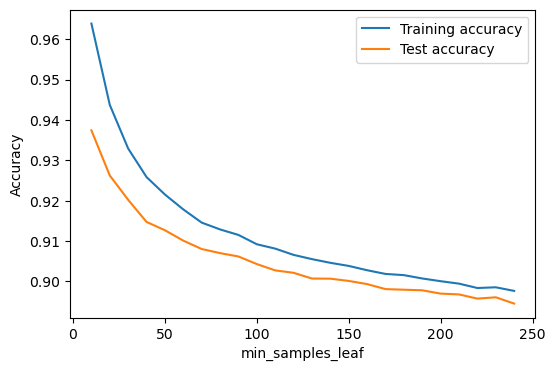

Fitting 3 folds for each of 31 candidates, totalling 93 fits

Best value of max_leaf_nodes: 340


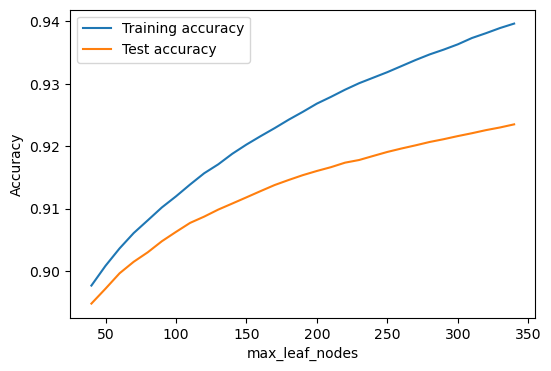

Fitting 3 folds for each of 35 candidates, totalling 105 fits

Best value of n_estimators: 320


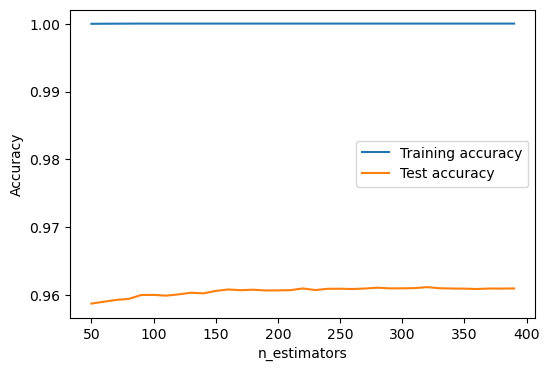

Fitting 3 folds for each of 2 candidates, totalling 6 fits

Best value of max_features: log2


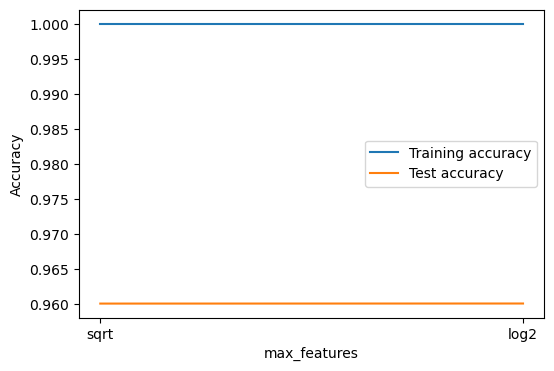

CPU times: total: 27min 23s
Wall time: 4h 10min 24s


In [128]:
%%time

params ={
    'max_depth' : range(2,20,2),
    'min_samples_split' : range(10,400,10),
    'min_samples_leaf' : range(10,250,10),
    'max_leaf_nodes' : range(40,350,10),
    'n_estimators' : range(50,400,10),
    'max_features' : ['sqrt', 'log2']
}



for param in params:
    find_optimal_hp_value(
        "Random Forest", RandomForestClassifier(random_state=42), 
        {param: params[param]}, X_train_resample, y_train_resample
    )


In [ ]:

# Define the hyperparameters and their search ranges

rf_model_params = {
    "max_depth": (8, 11, 1),
    "min_samples_split": (150, 250, 10),
    "min_samples_leaf": (30, 130, 10),
    'max_leaf_nodes' : (60, 140, 10),
    'n_estimators' : (100, 200, 20),
}

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Optimizing & evaluating the RF model on various paramters

# 1. On basic RF Model

rf_model_base = rf_model

rf_model_base.fit(X_train_resample, y_train_resample)

get_model_predictions("Random Forest Base", rf_model_base, X_train_resample, y_train_resample, X_test, y_test)

# Separation line
print("\n\n" + "*"*70 + "\n")

# 2. On Pipelined Optuna Model without pca_components

rf_hpt_pipelined_model = optimise_and_evaluate_pipeline("Random Forest HPT Pipelined", rf_model, rf_model_params, 
                                                        X_train_resample, y_train_resample, X_test, y_test, n_trials=100, pca_components_given=False)

get_model_predictions("Random Forest HPT Pipelined", rf_hpt_pipelined_model, X_train_resample, y_train_resample, X_test, y_test)

# Separation line
print("\n\n" + "*"*70 + "\n")


# 3. On Pipelined Optuna Model with varied pca_components
rf_pca_list = [36, 43]

for pca in rf_pca_list:

    rf_hpt_pipelined_model_pca = optimise_and_evaluate_pipeline(f"Random Forest HPT PCA - {pca}", rf_model, rf_model_params, 
                                                                X_train_resample, y_train_resample, X_test, y_test, n_trials=100, pca_components_given=True, pca_components=pca)

    get_model_predictions(f"Random Forest HPT PCA - {pca}", rf_hpt_pipelined_model_pca, X_train_resample, y_train_resample, X_test, y_test)

    # Separation line
    print("\n\n" + "*"*70 + "\n")




Random Forest Base : 

 Train score :  0.999989832438588

 Test score :  0.8980128579777907

 Confusion matrix : 
 [[12291     4]
 [ 1392     1]]


**********************************************************************


Best Hyperparameters for the Random Forest HPT Pipelined are : 
 {'max_depth': 9, 'min_samples_split': 150, 'min_samples_leaf': 30, 'max_leaf_nodes': 140, 'n_estimators': 180}

Random Forest HPT Pipelined : 

 Train score :  0.9123861233121848

 Test score :  0.9390707188778492

 Confusion matrix : 
 [[11984   311]
 [  523   870]]


**********************************************************************


Best Hyperparameters for the Random Forest HPT PCA - 36 are : 
 {'max_depth': 10, 'min_samples_split': 160, 'min_samples_leaf': 30, 'max_leaf_nodes': 140, 'n_estimators': 180}

Random Forest HPT PCA - 36 : 

 Train score :  0.882737514234586

 Test score :  0.8982320280537697

 Confusion matrix : 
 [[12295     0]
 [ 1393     0]]


*************************************

In [123]:
models_score_accuracy

,Model,Accuracy,Precision,Recall,f1_score,ROC_AUC
0,Random Forest Base,0.898013,0.200000,0.000718,0.001431,0.724791
0,Random Forest HPT Pipelined,0.939071,0.736664,0.624551,0.675991,0.917897
0,Random Forest HPT PCA - 36,0.898232,0.000000,0.000000,0.000000,0.504128
0,Random Forest HPT PCA - 43,0.898232,0.000000,0.000000,0.000000,0.504708


## XGBoost

Fitting 3 folds for each of 29 candidates, totalling 87 fits



Best value of min_samples_split: 5


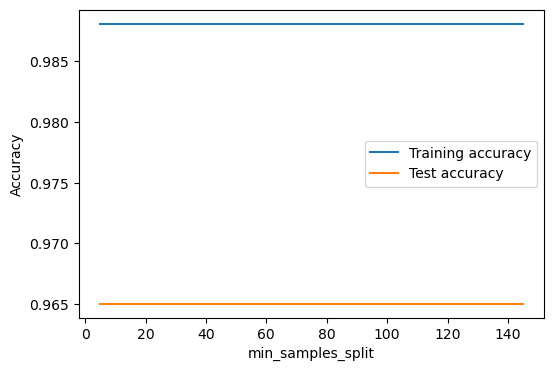

Fitting 3 folds for each of 19 candidates, totalling 57 fits

Best value of min_samples_leaf: 5


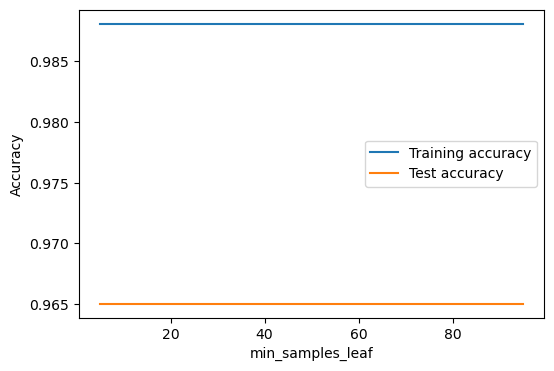

Fitting 3 folds for each of 7 candidates, totalling 21 fits

Best value of max_depth: 12


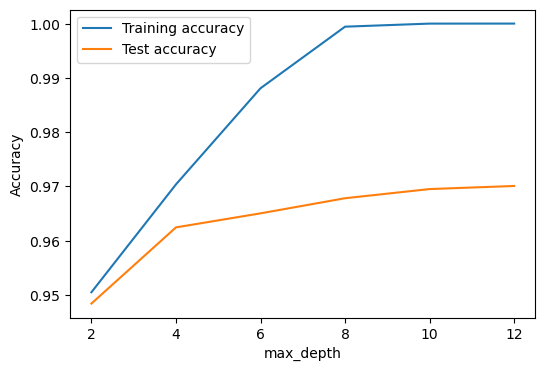

Fitting 3 folds for each of 98 candidates, totalling 294 fits

Best value of n_estimators: 97


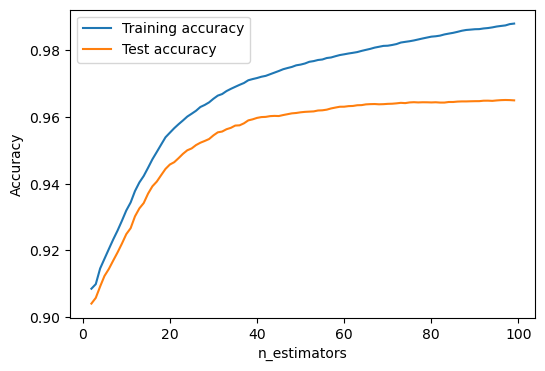

Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best value of learning_rate: 0.18999999999999997


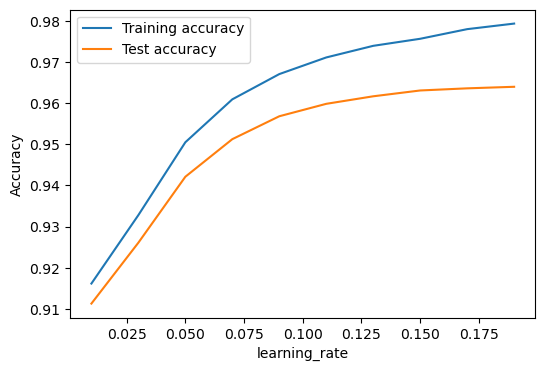

Fitting 3 folds for each of 5 candidates, totalling 15 fits

Best value of subsample: 0.5


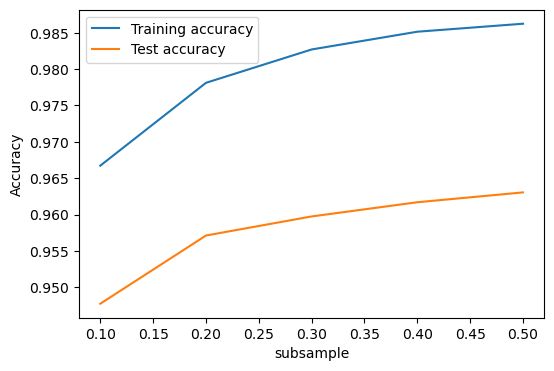

Fitting 3 folds for each of 3 candidates, totalling 9 fits

Best value of max_features: auto


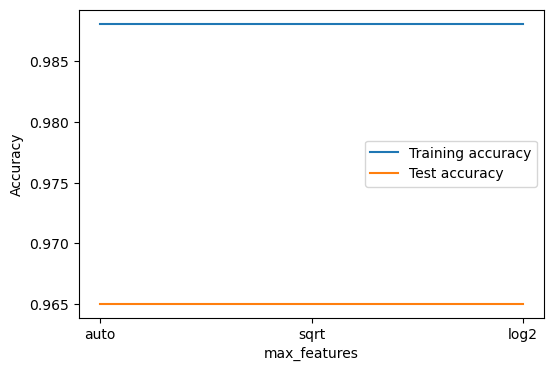

Fitting 3 folds for each of 2 candidates, totalling 6 fits

Best value of criterion: friedman_mse


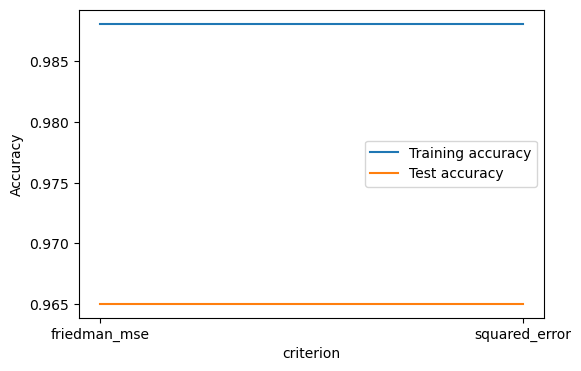

CPU times: total: 7min 2s
Wall time: 39min 24s


In [123]:
%%time


params ={

    'min_samples_split' : range(5,150,5),
    'min_samples_leaf' : range(5,100,5),
    'max_depth' : range(2,15,2),
    'n_estimators' : range(2,100, 1),
    'learning_rate': np.arange(0.01, 0.2, 0.02),
    'subsample': np.arange(0.1, 0.6, 0.1),    
    'max_features' : ['auto', 'sqrt', 'log2'],
    'criterion': ['friedman_mse', 'squared_error'],
}


for param in params:
    find_optimal_hp_value(
        "XGBoost", XGBClassifier(random_state=42), 
        {param: params[param]}, X_train_resample, y_train_resample
    )

In [ ]:

# Define the hyperparameters and their search ranges
xgb_model_params = {
    'max_depth' : (2, 5, 1),
    'n_estimators' : (20, 70, 5),
    'learning_rate': (0.05, 0.15, 0.005),
    'subsample': (0.2, 1.0, 0.1),
}


# Create a XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)

# Optimizing & evaluating the RF model on various paramters

# 1. On basic XGB Model

xgb_model_base = xgb_model

xgb_model_base.fit(X_train_resample, y_train_resample)

get_model_predictions("XGBoost Base", xgb_model_base, X_train_resample, y_train_resample, X_test, y_test)

# Separation line
print("\n\n" + "*"*70 + "\n")


# 2. On Pipelined Optuna Model without pca_components

xgb_hpt_pipelined_model = optimise_and_evaluate_pipeline("XGBoost HPT Pipelined", xgb_model, xgb_model_params, 
                                                         X_train_resample, y_train_resample, X_test, y_test, n_trials=100, pca_components_given=False)

get_model_predictions("XGBoost HPT Pipelined", xgb_hpt_pipelined_model, X_train_resample, y_train_resample, X_test, y_test)

# Separation line
print("\n\n" + "*"*70 + "\n")


# 3. On Pipelined Optuna Model with varied pca_components
xgb_pca_list = [36, 43, 58]

for pca in xgb_pca_list:

    xgb_hpt_pipelined_model_pca = optimise_and_evaluate_pipeline(f"XGBoost HPT PCA - {pca}", xgb_model, xgb_model_params, 
                                                                 X_train_resample, y_train_resample, X_test, y_test, n_trials=100, 
                                                                 pca_components_given=True, pca_components=pca)

    get_model_predictions(f"XGBoost HPT PCA - {pca}", xgb_hpt_pipelined_model_pca, X_train_resample, y_train_resample, X_test, y_test)
    
    # Separation line
    print("\n\n" + "*"*70 + "\n")




XGBoost Base : 

 Train score :  0.9839352529689279

 Test score :  0.9219023962594973

 Confusion matrix : 
 [[12206    89]
 [  980   413]]


**********************************************************************


Best Hyperparameters for the XGBoost HPT Pipelined are : 
 {'max_depth': 3, 'n_estimators': 70, 'learning_rate': 0.1499944257237705, 'subsample': 0.9347475283678497}

XGBoost HPT Pipelined : 

 Train score :  0.9368391085082154

 Test score :  0.9408240794856809

 Confusion matrix : 
 [[12032   263]
 [  547   846]]


**********************************************************************


Best Hyperparameters for the XGBoost HPT PCA - 36 are : 
 {'max_depth': 5, 'n_estimators': 60, 'learning_rate': 0.13874279042912607, 'subsample': 0.7817521355324945}

XGBoost HPT PCA - 36 : 

 Train score :  0.901944037741988

 Test score :  0.8983781414377557

 Confusion matrix : 
 [[12295     0]
 [ 1391     2]]


**********************************************************************


B

## Output

In [78]:
# Final models

dt_params = {
    'max_depth': 7, 
    'min_samples_split': 300, 
    'min_samples_leaf': 150, 
    'max_leaf_nodes': 120, 
    'max_features': 'auto', 
    'criterion': 'entropy'
}

rf_params = {
    'max_depth': 9, 
    'min_samples_split': 150, 
    'min_samples_leaf': 30, 
    'max_leaf_nodes': 140, 
    'n_estimators': 180
}

xgb_params = {
    'max_depth': 3, 
    'n_estimators': 70, 
    'learning_rate': 0.1499944257237705, 
    'subsample': 0.9347475283678497
}

models = {
    "Decision Tree" : {
        "model" : DecisionTreeClassifier(random_state=42),
        "params": dt_params
    },
    "Random Forest" : {
        "model" : RandomForestClassifier(random_state=42),
        "params": rf_params
    },
    "XGBoost" : {
        "model" : XGBClassifier(random_state=42),
        "params": xgb_params
    },
}

final_models = {

}

for model_name in models:

    model = models[model_name]["model"]
    model.set_params(**models[model_name]["params"])
    
    model.fit(X_train_resample, y_train_resample)
    
    get_model_predictions(model_name, model, X_train_resample, y_train_resample, X_test, y_test)

    final_models[model_name] = model

models_score_accuracy  



Decision Tree : 

 Train score :  0.8416910688140556

 Test score :  0.9299386323787259

 Confusion matrix : 
 [[11833   462]
 [  497   896]]

Random Forest : 

 Train score :  0.9123861233121848

 Test score :  0.9390707188778492

 Confusion matrix : 
 [[11984   311]
 [  523   870]]

XGBoost : 

 Train score :  0.9368391085082154

 Test score :  0.9408240794856809

 Confusion matrix : 
 [[12032   263]
 [  547   846]]


,Model,Accuracy,Precision,Recall,f1_score,ROC_AUC
0,Decision Tree,0.929939,0.659794,0.643216,0.651399,0.879829
0,Random Forest,0.939071,0.736664,0.624551,0.675991,0.917897
0,XGBoost,0.940824,0.762849,0.607322,0.676259,0.913944


In [79]:
final_models

{'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='auto',
                        max_leaf_nodes=120, min_samples_leaf=150,
                        min_samples_split=300, random_state=42),
 'Random Forest': RandomForestClassifier(max_depth=9, max_leaf_nodes=140, min_samples_leaf=30,
                        min_samples_split=150, n_estimators=180,
                        random_state=42),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1499944257237705,
               max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=3, max_le

In [129]:
# Creating output file

for model_name in final_models:
    
    output_test = unseen_cleaned.copy()

    model = final_models[model_name]

    # Predicting the test data
    output_test['churn_probability'] = model.predict(output_test)

    # Creating the dataframe
    output = output_test[['id', 'churn_probability']]


    # Creating the csv file
    output.to_csv(f"{model_name} Final.csv", index=False)


In [80]:
# Finalising output file for submission using RF model as it has the highest accuracy for the unseen data

final_model = final_models["Random Forest"]

# Predicting the test data
unseen_cleaned['churn_probability'] = final_model.predict(unseen_cleaned)

# Creating the dataframe
submission = unseen_cleaned[['id', 'churn_probability']]

# Creating the csv file
submission.to_csv("Submission.csv", index=False)


# Business Insights

In [81]:
imp_features = final_model.feature_importances_

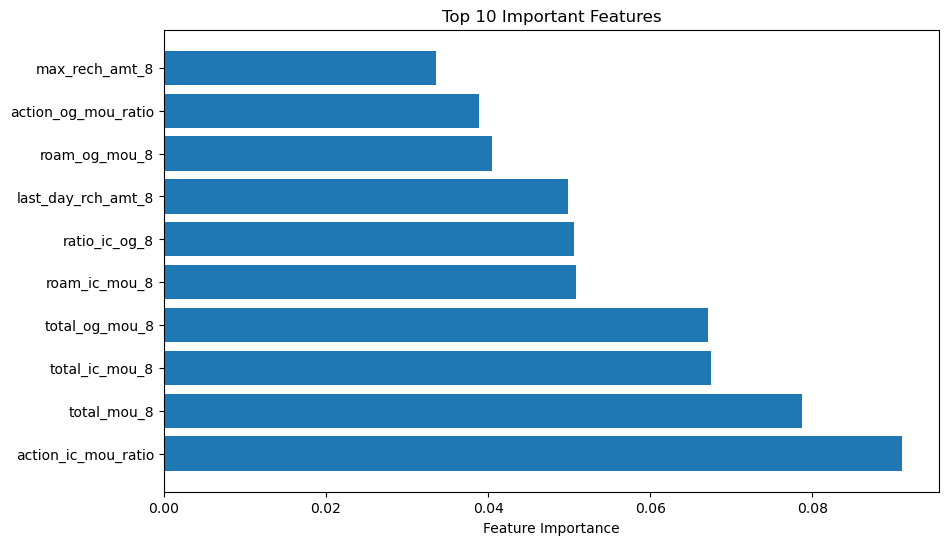

Rank 1: action_ic_mou_ratio (Importance: 0.0911)
Rank 2: total_mou_8 (Importance: 0.0787)
Rank 3: total_ic_mou_8 (Importance: 0.0675)
Rank 4: total_og_mou_8 (Importance: 0.0671)
Rank 5: roam_ic_mou_8 (Importance: 0.0508)
Rank 6: ratio_ic_og_8 (Importance: 0.0505)
Rank 7: last_day_rch_amt_8 (Importance: 0.0499)
Rank 8: roam_og_mou_8 (Importance: 0.0405)
Rank 9: action_og_mou_ratio (Importance: 0.0389)
Rank 10: max_rech_amt_8 (Importance: 0.0336)


In [115]:
# Get the indices that would sort the feature importance scores in descending order
sorted_indices = np.argsort(-imp_features)

# Reorder the feature names based on the sorted indices
sorted_feature_names = X_train.columns[sorted_indices]

# Reorder the feature importance scores accordingly
sorted_imp_features = imp_features[sorted_indices]

# Define the number of top features to display
top_n = 10

# Visualize the top N important features
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names[:top_n], sorted_imp_features[:top_n])
plt.xlabel('Feature Importance')
plt.title(f'Top {top_n} Important Features')
plt.show()

# Display the sorted feature names and their ranks for the top N features
for rank, feature_name in enumerate(sorted_feature_names[:top_n], start=1):
    print(f"Rank {rank}: {feature_name} (Importance: {sorted_imp_features[rank - 1]:.4f})")

## Important predictive variables which decide churn are as follows :

1. **'action_ic_mou_ratio'** - Ratio of incoming and outgoing calls in the action phase 
2. **'total_mou_8'** - Total minutes of usage in the month of August
3. **'total_ic_mou_8'** - Total incoming minutes of usage in the month of August
4. **'total_og_mou_8'** - Total outgoing minutes of usage in the month of August
5. **'roam_ic_mou_8'** - Roaming incoming minutes of usage in the month of August
6. **'ratio_ic_og_8'** - Ratio of incoming and outgoing calls in the month of August
7. **'last_day_rch_amt_8'** - Last day recharge amount in the month of August 
8. **'roam_og_mou_8'** - Roaming outgoing minutes of usage in the month of August
9. **'action_og_mou_ratio'** - Ratio of incoming and outgoing calls in the action phase
10. **'max_rech_amt_8'** - Maximum recharge amount in the month of August


## Strategies to Implement to Reduce Churn


1. **Analyze and Improve Calling Patterns:** <br> Pay close attention to the 'action_ic_mou_ratio' and 'ratio_ic_og_8' variables, which represent the ratio of incoming and outgoing calls during the action phase and in August, respectively. High imbalances in these ratios might indicate that some customers are receiving more calls than they make. You can analyze this further and offer personalized plans or incentives to balance these ratios.

2. **Incentivize High-Value Customers:** <br>'total_mou_8' and 'total_ic_mou_8' are important features related to total usage and incoming minutes in August. Identify high-value customers with substantial usage and incoming calls and offer them special benefits or loyalty programs to retain them.

3. **Focus on Roaming Services:** <br> The variables 'roam_ic_mou_8' and 'roam_og_mou_8' indicate roaming incoming and outgoing minutes. If customers are using a significant amount of roaming services, consider offering competitive roaming packages or discounts to keep them satisfied.

4. **Recharge Amounts:** <br> Pay attention to 'last_day_rch_amt_8' and 'max_rech_amt_8,' which represent the last day recharge amount and maximum recharge amount in August. These are crucial indicators of customer engagement. Offer targeted promotions or discounts to encourage customers to recharge more frequently and with larger amounts.

5. **Monitor and Address Call Drop Issues:** <br> If the 'total_og_mou_8' and 'action_og_mou_ratio' variables are important, this might indicate problems with the quality of outgoing calls during the action phase i.e., August. Address call drop issues promptly to improve customer satisfaction.

6. **Segmentation and Personalization:** <br> Use these insights to segment your customer base and create personalized offers and incentives based on their behavior and usage patterns. Not all customers will have the same needs, so tailoring your approach can be more effective.

7. **Customer Retention Campaigns:** <br> Create customer retention campaigns that specifically target individuals with a high risk of churn based on these predictive variables. Reach out to them with exclusive offers, discounts, or incentives to convince them to stay with your service.

8. **Competitive Analysis:** <br> Keep an eye on your competitors and their offerings. Ensure that your services and pricing remain competitive in the market.



